# Import libraries

In [6]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [7]:
# Load drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preparation


In [8]:
# Load data

df1 = pd.read_csv('/content/drive/MyDrive/Programacion/Molotov/entretien_data_analyse/channel.csv').iloc[:, 1:]
channel_data = df1

df2 = pd.read_csv('/content/drive/MyDrive/Programacion/Molotov/entretien_data_analyse/subscriptions.csv').iloc[:, 1:]
subscriptions_data = df2

df3 = pd.read_csv('/content/drive/MyDrive/Programacion/Molotov/entretien_data_analyse/users.csv').iloc[:, 1:]
users_data = df3

df4 = pd.read_csv('/content/drive/MyDrive/Programacion/Molotov/entretien_data_analyse/watch.csv').iloc[:, 1:]
watch_data = df4

## Preview data

In [9]:
channel_data.head()

,NAME,CHANNEL_ID
0,chada_tv,407
1,rotana_cinema,991
2,Franceinfo,567
3,cheddar,557
4,TF1 4K,331


In [10]:
subscriptions_data.head()

,ID,USER_ID,SUBSCRIPTION_BEGIN_DATE,SUBSCRIPTION_END_DATE,PRODUCT_NAME
0,15693516,ae741c8cac8927c28ed6ba664b92e21790451a40,2021-10-30 09:22:45,2022-10-30 02:00:00,Molotov Plus
1,29874774,108fa3ba55652192ec5e5228c9ad3046cae83a95,2023-06-11 22:47:18,NaN,Molotov Extra
2,4560393,22e1710d834e97bced710dfefbf2f712264d08c1,2018-06-29 01:22:52,2018-07-28 05:09:38,Molotov Extended
3,28736301,7b57746a067ca784a5d5520706b9032df7249667,2023-01-30 20:49:17,2023-04-30 20:49:14,Molotov Extra
4,30053859,d9a382d5c47234795e7cb2b12218032142cb5c10,2023-07-06 07:10:53,2023-08-06 02:00:00,Molotov Giga


In [11]:
users_data.head()

,ID,BIRTHDAY,ACCOUNT_CREATION_DATE
0,e5e47be85a5c2d93e87cc00dfeb6f591fad72db2,1996-12-04,2017-10-14 00:43:16
1,dd2628cb469d58c654fac74aa74d36a1e67d7279,1997-05-03,2017-04-27 21:25:49
2,91fb3d1ac537671dd45614892c5d521f28a0121f,2002-10-05,2017-08-29 15:15:06
3,9b490bc7ac99e822e36d13b7377e649c76a4a95a,1976-06-28,2018-07-03 18:51:51
4,bbe6cc5d916a41dacbe1abfcece887e31b52cda6,1976-12-19,2018-11-06 18:34:31


In [12]:
watch_data.head()

,DATE_DAY,USER_ID,DEVICE_TYPE,PROGRAM_KIND,ASSET_TYPE,DURATION,CHANNEL_ID,EVENT_ID
0,2022-11-20,719b8afd09296c39ffc1ac593c022147cba98f0b,tv,Culture,live,280,195.0,1812653.0
1,2022-11-20,1dd2019130b3d63f0633b8a5d8615d3e25838df3,tv,Informations,live,120,209.0,1418857.0
2,2022-11-20,a20244708aa32f9b0ed08db6d6e642c1d886c5b3,phone,Séries,live,526,201.0,413864.0
3,2022-11-20,6d2db5d98f7edeabc0dbf502fcc36ec7de2170b2,phone,Séries,live,200,209.0,1836965.0
4,2022-11-20,1d19df4eba5845b4c888f0b21ec3bdcc0ea0567d,tv,Informations,live,480,383.0,2207387.0


## Check datatypes and adjust

In [13]:
channel_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NAME        379 non-null    object
 1   CHANNEL_ID  380 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.1+ KB


In [14]:
channel_data['NAME'] = channel_data['NAME'].astype('string')
channel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NAME        379 non-null    string
 1   CHANNEL_ID  380 non-null    int64 
dtypes: int64(1), string(1)
memory usage: 6.1 KB


In [15]:
subscriptions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18946 entries, 0 to 18945
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       18946 non-null  int64 
 1   USER_ID                  18946 non-null  object
 2   SUBSCRIPTION_BEGIN_DATE  18946 non-null  object
 3   SUBSCRIPTION_END_DATE    14616 non-null  object
 4   PRODUCT_NAME             18946 non-null  object
dtypes: int64(1), object(4)
memory usage: 740.2+ KB


In [16]:
subscriptions_data['USER_ID'] = subscriptions_data['USER_ID'].astype('string')
subscriptions_data['SUBSCRIPTION_BEGIN_DATE'] = pd.to_datetime(subscriptions_data['SUBSCRIPTION_BEGIN_DATE'])
subscriptions_data['SUBSCRIPTION_END_DATE'] = pd.to_datetime(subscriptions_data['SUBSCRIPTION_END_DATE'])
subscriptions_data['PRODUCT_NAME'] = subscriptions_data['PRODUCT_NAME'].astype('string')

subscriptions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18946 entries, 0 to 18945
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       18946 non-null  int64         
 1   USER_ID                  18946 non-null  string        
 2   SUBSCRIPTION_BEGIN_DATE  18946 non-null  datetime64[ns]
 3   SUBSCRIPTION_END_DATE    14616 non-null  datetime64[ns]
 4   PRODUCT_NAME             18946 non-null  string        
dtypes: datetime64[ns](2), int64(1), string(2)
memory usage: 740.2 KB


In [17]:
users_data['ID'] = users_data['ID'].astype('string')
users_data['BIRTHDAY'] = pd.to_datetime(users_data['BIRTHDAY'])
users_data['ACCOUNT_CREATION_DATE'] = pd.to_datetime(users_data['ACCOUNT_CREATION_DATE'])

users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42246 entries, 0 to 42245
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     42246 non-null  string        
 1   BIRTHDAY               39589 non-null  datetime64[ns]
 2   ACCOUNT_CREATION_DATE  42246 non-null  datetime64[ns]
dtypes: datetime64[ns](2), string(1)
memory usage: 990.3 KB


In [18]:
watch_data['DATE_DAY'] = pd.to_datetime(watch_data['DATE_DAY'])
watch_data['USER_ID'] = watch_data['USER_ID'].astype('string')
watch_data['DEVICE_TYPE'] = watch_data['DEVICE_TYPE'].astype('string')
watch_data['PROGRAM_KIND'] = watch_data['PROGRAM_KIND'].astype('string')
watch_data['ASSET_TYPE'] = watch_data['ASSET_TYPE'].astype('string')
watch_data['DURATION'] = watch_data['DURATION'].astype('float64')
watch_data['CHANNEL_ID'] = watch_data['CHANNEL_ID'].astype('float64')
watch_data['EVENT_ID'] = watch_data['EVENT_ID'].fillna(0)
watch_data['EVENT_ID'] = watch_data['EVENT_ID'].astype('int64')

watch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237205 entries, 0 to 237204
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DATE_DAY      237205 non-null  datetime64[ns]
 1   USER_ID       237204 non-null  string        
 2   DEVICE_TYPE   237202 non-null  string        
 3   PROGRAM_KIND  237205 non-null  string        
 4   ASSET_TYPE    237200 non-null  string        
 5   DURATION      237205 non-null  float64       
 6   CHANNEL_ID    237204 non-null  float64       
 7   EVENT_ID      237205 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), string(4)
memory usage: 14.5 MB


## Check duplicates, null, unique values and descriptive stats

In [19]:
# CHANNEL
# Check for duplicates
duplicates_channel = channel_data.duplicated().sum()
print("Number of duplicate rows in Channel:", duplicates_channel)

# Check for null or missing values
null_values_channel = channel_data.isnull().sum()
print("\nNull values in Channel:")
print(null_values_channel)

# Check unique values
unique_values_channel = channel_data.nunique()
print("\nUnique values in Channel:")
print(unique_values_channel)

# Explore descriptive statistics
channel_statistics = channel_data.describe()
print("\nDescriptive statistics in Channel:")
print(channel_statistics)

Number of duplicate rows in Channel: 0

Null values in Channel:
NAME          1
CHANNEL_ID    0
dtype: int64

Unique values in Channel:
NAME          379
CHANNEL_ID    380
dtype: int64

Descriptive statistics in Channel:
        CHANNEL_ID
count   380.000000
mean    892.373684
std     493.479699
min     111.000000
25%     408.500000
50%     854.000000
75%    1385.500000
max    1639.000000


In [20]:
# SUBSCRIPTIONS
# Check for duplicates
duplicates_subscription = subscriptions_data.duplicated().sum()
print("Number of duplicate rows in Subscription:", duplicates_subscription)

# Check for null or missing values
subscription_null_values = subscriptions_data.isnull().sum()
print("\nNull values in Subscription:")
print(subscription_null_values)

# Check unique values
unique_subscription_values = subscriptions_data.nunique()
print("\nUnique values in Subscription:")
print(unique_subscription_values)

# Explore descriptive statistics
subscription_statistics = subscriptions_data.describe()
print("\nDescriptive statistics in Subscription:")
print(subscription_statistics)

Number of duplicate rows in Subscription: 0

Null values in Subscription:
ID                            0
USER_ID                       0
SUBSCRIPTION_BEGIN_DATE       0
SUBSCRIPTION_END_DATE      4330
PRODUCT_NAME                  0
dtype: int64

Unique values in Subscription:
ID                         18944
USER_ID                     8768
SUBSCRIPTION_BEGIN_DATE    18543
SUBSCRIPTION_END_DATE      12626
PRODUCT_NAME                   4
dtype: int64

Descriptive statistics in Subscription:
                 ID
count  1.894600e+04
mean   2.025146e+07
std    8.368229e+06
min    1.989870e+05
25%    1.284758e+07
50%    2.163688e+07
75%    2.826387e+07
max    3.150704e+07


In [21]:
# USERS

# Check for duplicates
user_duplicates = users_data.duplicated().sum()
print("Number of duplicate rows in User:", user_duplicates)

# Check for null or missing values
user_null_values = users_data.isnull().sum()
print("\nNull values in User:")
print(user_null_values)

# Check unique values
user_unique_values = users_data.nunique()
print("\nUnique values in User:")
print(user_unique_values)

# Explore descriptive stats
user_statistics = users_data.describe()
print("\nDescriptive statistics in User:")
print(user_statistics)

Number of duplicate rows in User: 0

Null values in User:
ID                          0
BIRTHDAY                 2657
ACCOUNT_CREATION_DATE       0
dtype: int64

Unique values in User:
ID                       42246
BIRTHDAY                 18228
ACCOUNT_CREATION_DATE    42239
dtype: int64

Descriptive statistics in User:
                                              ID             BIRTHDAY  \
count                                      42246                39589   
unique                                     42246                18228   
top     e5e47be85a5c2d93e87cc00dfeb6f591fad72db2  1990-02-19 00:00:00   
freq                                           1                   10   
first                                        NaN  1800-01-01 00:00:00   
last                                         NaN  2010-11-03 00:00:00   

       ACCOUNT_CREATION_DATE  
count                  42246  
unique                 42239  
top      2020-04-19 17:14:24  
freq                       2  
first    

In [22]:
# WATCH

# Check for duplicates
duplicates_watch = watch_data.duplicated().sum()
print("Number of duplicate rows in Watch:", duplicates_watch)

# Check for null or missing values
watch_null_values = watch_data.isnull().sum()
print("\nNull values in Watch:")
print(watch_null_values)

# Check unique values
watch_unique_values = watch_data.nunique()
print("\nUnique values in Watch:")
print(watch_unique_values)

# Explore descriptive statistics
watch_statistics = watch_data.describe()
print("\nDescriptive statistics in Watch:")
print(watch_statistics)

Number of duplicate rows in Watch: 0

Null values in Watch:
DATE_DAY        0
USER_ID         1
DEVICE_TYPE     3
PROGRAM_KIND    0
ASSET_TYPE      5
DURATION        0
CHANNEL_ID      1
EVENT_ID        0
dtype: int64

Unique values in Watch:
DATE_DAY            12
USER_ID          12428
DEVICE_TYPE          5
PROGRAM_KIND         8
ASSET_TYPE           5
DURATION         11497
CHANNEL_ID         225
EVENT_ID        225606
dtype: int64

Descriptive statistics in Watch:
            DURATION     CHANNEL_ID      EVENT_ID
count  237205.000000  237204.000000  2.372050e+05
mean     1893.484547     243.814868  1.186665e+06
std      3505.327767     242.192999  6.844893e+05
min       -10.000000     115.000000  0.000000e+00
25%       280.000000     149.000000  5.936650e+05
50%       852.000000     195.000000  1.186533e+06
75%      2352.000000     209.000000  1.778975e+06
max    360000.000000    1639.000000  2.372037e+06


# General consumption trends for Molotov users

In [23]:
# Calculate totals
total_users = users_data.shape[0]
total_events = watch_data.shape[0]
total_channels = channel_data.shape[0]

print("Total users:", total_users)
print("Total events:", total_events)
print("Total channels:", total_channels)

Total users: 42246
Total events: 237205
Total channels: 380


In [24]:
# Values for device type
print(watch_data['DEVICE_TYPE'].unique())

<StringArray>
['tv', 'phone', 'desktop', 'tablet', <NA>, 'smart_display']
Length: 6, dtype: string


## Stats by device type

In [25]:
# Group by device type
watch_grouped_device = watch_data.groupby("DEVICE_TYPE")

# Dictionary to save results
results = {}

# Calculate metrics for each device type
for DEVICE_TYPE in watch_grouped_device.groups.keys():

    df = watch_grouped_device.get_group(DEVICE_TYPE)
    unique_users_device = df["USER_ID"].nunique()
    sessions_device = df.shape[0]
    avg_duration = df["DURATION"].mean() / 60 # Convert a minutes
    share_users = (unique_users_device / total_users) * 100
    share_sessions = (sessions_device / total_events) * 100

    results[DEVICE_TYPE] = {
        "Unique users": unique_users_device,
        "Total events": sessions_device,
        "AVG Duration (min)": avg_duration,
        "Users Share": share_users,
        "Events Share": share_sessions,
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T  # Transpose the DataFrame to have devices as rows

# Format numeric values with comma separators and no decimal places
results_df["Unique users"] = results_df["Unique users"].apply(lambda x: "{:,.0f}".format(x))
results_df["Total events"] = results_df["Total events"].apply(lambda x: "{:,.0f}".format(x))
results_df["AVG Duration (min)"] = results_df["AVG Duration (min)"].apply(lambda x: "{:,.2f}".format(x))
results_df["Users Share"] = results_df["Users Share"].apply(lambda x: "{:.2f}%".format(x))
results_df["Events Share"] = results_df["Events Share"].apply(lambda x: "{:.2f}%".format(x))


# Show the sorted results DataFrame
print(results_df.to_string(index=True))
print()
print("Note: The device with the most users is TV, followed by the phone.")


              Unique users Total events AVG Duration (min) Users Share Events Share
desktop              1,988       34,178              27.01       4.71%       14.41%
phone                4,154       34,706              18.35       9.83%       14.63%
smart_display           81        1,087              22.91       0.19%        0.46%
tablet               1,571       19,368              25.34       3.72%        8.17%
tv                   6,661      147,863              36.59      15.77%       62.34%

Note: The device with the most users is TV, followed by the phone.


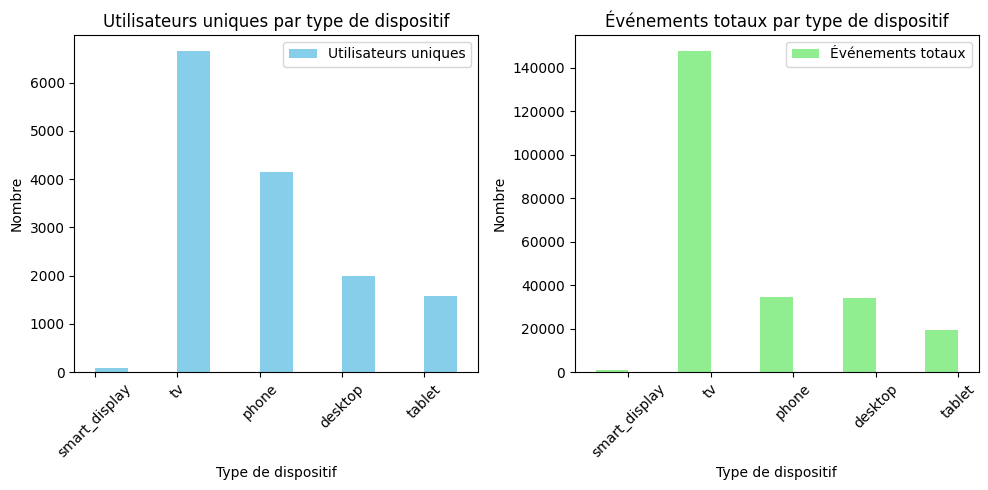

In [26]:
# Sort DataFrame by Unique users in descending order
results_df = results_df.sort_values(by="Unique users", ascending=False)

# Define the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot unique users
results_df["Unique users"].str.replace(',', '').astype(float).plot(kind='bar', ax=ax1, color='skyblue', width=0.4, position=0, label='Utilisateurs uniques')
ax1.set_xlabel('Type de dispositif')
ax1.set_ylabel('Nombre')
ax1.set_title('Utilisateurs uniques par type de dispositif')
ax1.set_xticklabels(results_df.index, rotation=45)
ax1.legend()

# Plot total events
results_df["Total events"].str.replace(',', '').astype(float).plot(kind='bar', ax=ax2, color='lightgreen', width=0.4, position=1, label='Événements totaux')
ax2.set_xlabel('Type de dispositif')
ax2.set_ylabel('Nombre')
ax2.set_title('Événements totaux par type de dispositif')
ax2.set_xticklabels(results_df.index, rotation=45)
ax2.legend()

# Show plot
plt.tight_layout()
plt.show()


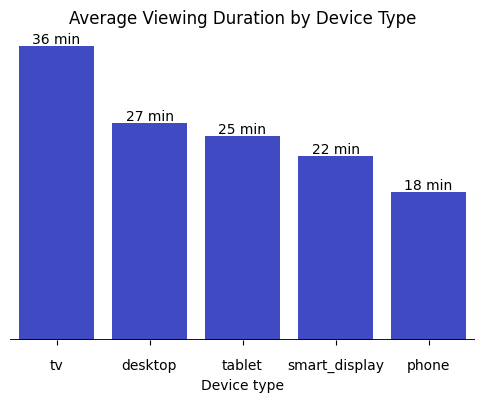

In [27]:
# Group by device type
watch_grouped_device = watch_data.groupby("DEVICE_TYPE")

# Dictionary to save results
results = {}

# Calculate metrics for each device type
for DEVICE_TYPE in watch_grouped_device.groups.keys():
    df = watch_grouped_device.get_group(DEVICE_TYPE)
    avg_duration = df["DURATION"].mean() / 60  # Convert to minutes
    results[DEVICE_TYPE] = avg_duration

# Convert results to DataFrame
results_df = pd.DataFrame(results, index=['Average Duration']).T

# Sort dataframe
results_df = results_df.sort_values(by='Average Duration', ascending=False)

# Reset index
results_df.reset_index(inplace=True)

# Create histogram
plt.figure(figsize=(6, 4))
barplot = sns.barplot(data=results_df, x='index', y='Average Duration', color='#2a38d9')

# Adjust bars
bar_width = 0.8
for patch in barplot.patches:
    patch.set_width(bar_width)

# Include labels
for index, row in results_df.iterrows():
    barplot.text(index, row['Average Duration'], f'{int(row["Average Duration"])} min', color='black', ha='center', va='bottom')

# Include axes labels
plt.xlabel('Device type')

# Move the title upwards
plt.title('Average Viewing Duration by Device Type', )

# Adjust text positions
plt.tick_params(axis='x', which='major', pad=10)

# Remove Y-axis
plt.gca().axes.get_yaxis().set_visible(False)

# Remove grid lines
plt.grid(False)

# Remove box around the plot
plt.box(on=None)

# Add a horizontal line at the bottom of the bars
plt.axhline(y=0, color='black', linewidth=2)

# Rotate texts
plt.xticks(rotation=0, ha='center')

# Show plot
plt.show()



In [28]:
# Calculate average duration for each device type
device_avg_duration = results_df.set_index('index').to_dict()['Average Duration']

# Calculate overall average duration
overall_avg_duration = (watch_data['DURATION'].mean())/60

# Print average duration for each device type
print("Average Duration by Device Type:")
for device_type, avg_duration in device_avg_duration.items():
    print(f"{device_type}: {avg_duration:.2f} min")

# Print overall average duration
print(f"\nOverall Average Duration: {overall_avg_duration:.2f} min")


Average Duration by Device Type:
tv: 36.59 min
desktop: 27.01 min
tablet: 25.34 min
smart_display: 22.91 min
phone: 18.35 min

Overall Average Duration: 31.56 min


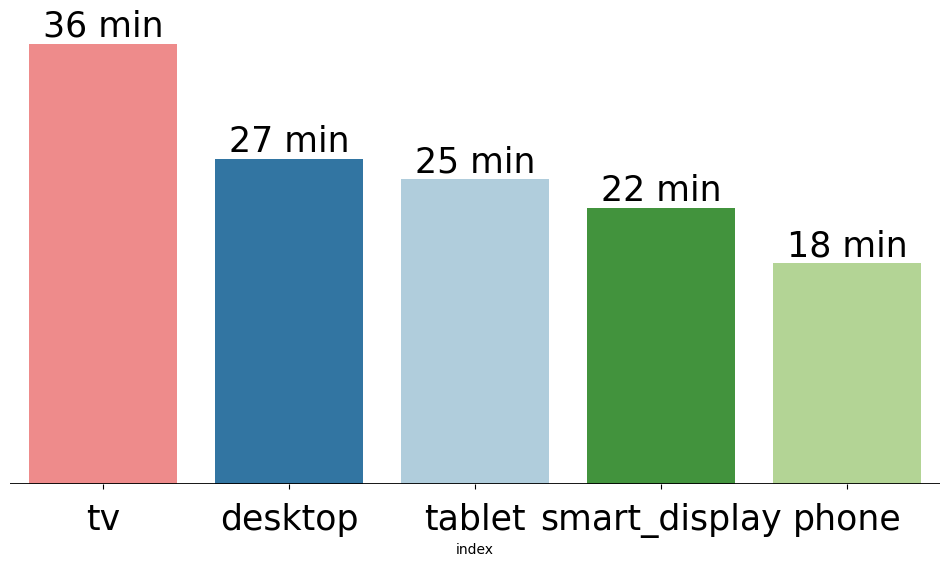

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Group by device type
watch_grouped_device = watch_data.groupby("DEVICE_TYPE")

# Dictionary to save results
results = {}

# Calculate metrics for each device type
for DEVICE_TYPE in watch_grouped_device.groups.keys():
    df = watch_grouped_device.get_group(DEVICE_TYPE)
    avg_duration = df["DURATION"].mean() / 60  # Convert to minutes
    results[DEVICE_TYPE] = avg_duration

# Convert results to DataFrame
results_df = pd.DataFrame(results, index=['Average Duration']).T

# Sort dataframe
results_df = results_df.sort_values(by='Average Duration', ascending=False)

# Reset index
results_df.reset_index(inplace=True)

# Create histogram
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=results_df, x='index', y='Average Duration', palette=['#ff7b7a', '#2078b4', '#a8cfe4', '#35a12f', '#b2df8a'])

# Adjust bars
bar_width = 0.8
for patch in barplot.patches:
    patch.set_width(bar_width)

# Include labels
for index, row in results_df.iterrows():
    barplot.text(index, row['Average Duration'], f'{int(row["Average Duration"])} min', color='black', ha='center', va='bottom', fontsize=25)

# Include axes labels

# Move the title upwards

# Adjust text positions
plt.tick_params(axis='x', which='major', pad=10, labelsize=25)

# Remove Y-axis
plt.gca().axes.get_yaxis().set_visible(False)

# Remove grid lines
plt.grid(False)

# Remove box around the plot
plt.box(on=None)

# Add a horizontal line at the bottom of the bars
plt.axhline(y=0, color='black', linewidth=2)

# Rotate texts
plt.xticks(rotation=0, ha='center')

# Show plot
plt.show()


## Visualizations per day and month

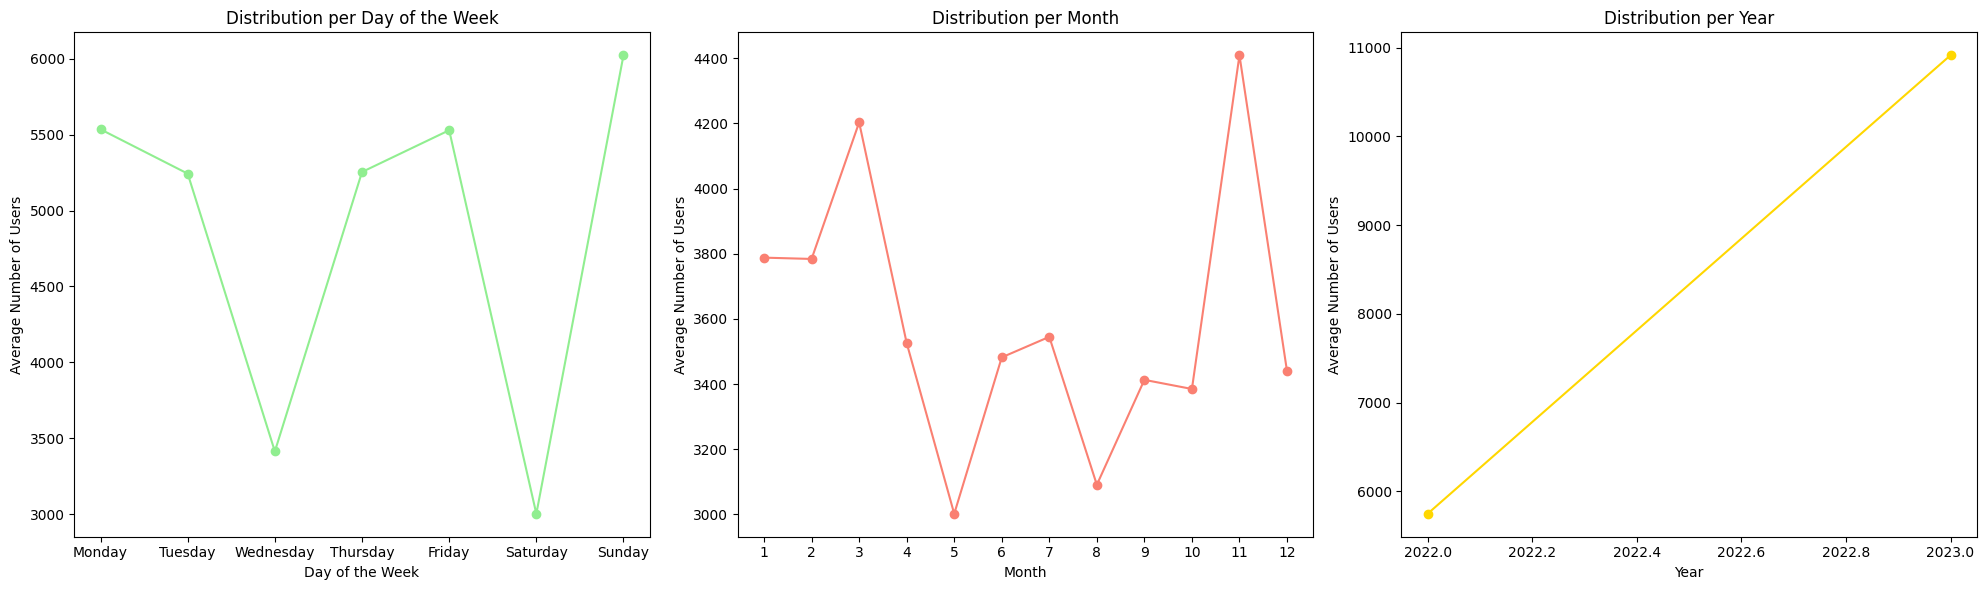

In [30]:
# Merge watch_data with user_data
merged_data = pd.merge(watch_data, users_data, left_on='USER_ID', right_on='ID', how='left')

# Extract hour, day of the week, month, and year from the timestamp
merged_data['Day_of_Week'] = merged_data['DATE_DAY'].dt.dayofweek  # Monday=0, Sunday=6
merged_data['Month'] = merged_data['DATE_DAY'].dt.month
merged_data['Year'] = merged_data['DATE_DAY'].dt.year

# Calculate the average number of users for each day of the week
daily_avg_users = merged_data.groupby('Day_of_Week')['USER_ID'].nunique()

# Calculate the average number of users for each month
monthly_avg_users = merged_data.groupby('Month')['USER_ID'].nunique()
# Calculate the average number of users for each year
yearly_avg_users = merged_data.groupby('Year')['USER_ID'].nunique()

# Create a figure and axes for the plots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot for distribution per day of the week
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
axes[0].plot(days_of_week, daily_avg_users.values, color='lightgreen', marker='o', linestyle='-')
axes[0].set_title('Distribution per Day of the Week')
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Average Number of Users')

# Plot for distribution per month
axes[1].plot(monthly_avg_users.index, monthly_avg_users.values, color='salmon', marker='o', linestyle='-')
axes[1].set_title('Distribution per Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Average Number of Users')
axes[1].set_xticks(range(1, 13))  # Show all months on the x-axis

# Plot for distribution per year
axes[2].plot(yearly_avg_users.index, yearly_avg_users.values, color='gold', marker='o', linestyle='-')
axes[2].set_title('Distribution per Year')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Average Number of Users')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()



## Divide by device type

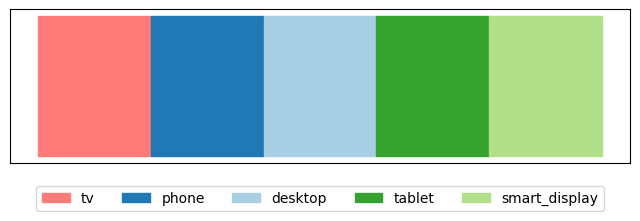

In [31]:
import matplotlib.pyplot as plt

# Define colors
colors = {
    'tv': '#ff7b7a',
    'phone': '#2078b4',
    'desktop': '#a8cfe4',
    'tablet': '#35a12f',
    'smart_display': '#b2df8a'
}




# Mostrar los colores asignados a cada dispositivo
plt.figure(figsize=(8, 2))
for i, (device, color) in enumerate(colors.items()):
    plt.fill_between([i, i+1], 0, 1, color=color, label=device)
plt.xticks([])
plt.yticks([])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5)
plt.show()


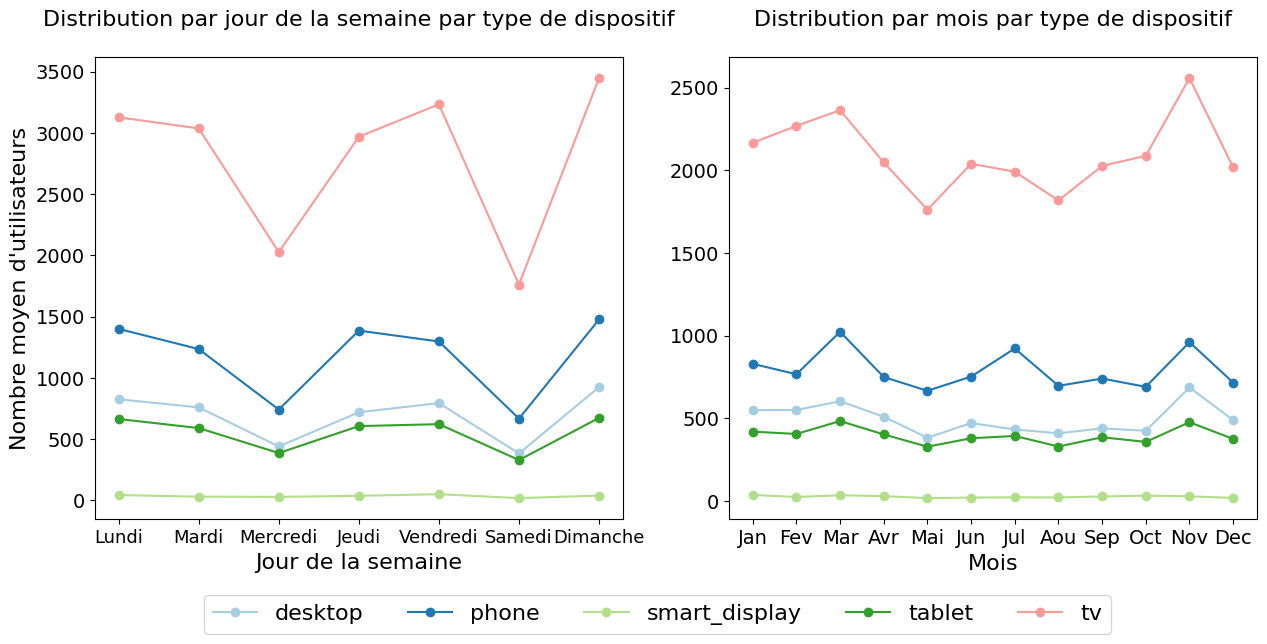

In [32]:
# Set the color palette
sns.set_palette("Paired")

# Calculate the average number of users for each day of the week and device type
daily_avg_users = merged_data.groupby(['Day_of_Week', 'DEVICE_TYPE'])['USER_ID'].nunique()

# Calculate the average number of users for each month and device type
monthly_avg_users = merged_data.groupby(['Month', 'DEVICE_TYPE'])['USER_ID'].nunique()

# Create a figure and axes for the plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for distribution per day of the week and device type
for device_type, data in daily_avg_users.groupby(level='DEVICE_TYPE'):
    axes[0].plot(data.index.get_level_values('Day_of_Week'), data.values, marker='o', linestyle='-', label=device_type)

axes[0].set_title('Distribution par jour de la semaine par type de dispositif', fontsize=16, y=1.05)
axes[0].set_xlabel('Jour de la semaine', fontsize=16)
axes[0].set_ylabel('Nombre moyen d\'utilisateurs', fontsize=16)
axes[0].set_xticks(range(7))
axes[0].set_xticklabels(['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche'], fontsize=13)
axes[0].tick_params(axis='y', labelsize=14)


# Plot for distribution per month and device type
for device_type, data in monthly_avg_users.groupby(level='DEVICE_TYPE'):
    axes[1].plot(data.index.get_level_values('Month'), data.values, marker='o', linestyle='-', label=device_type)

axes[1].set_title('Distribution par mois par type de dispositif', fontsize=16, y=1.05)
axes[1].set_xlabel('Mois', fontsize=16)
axes[1].set_ylabel('', fontsize=16)
axes[1].set_xticks(range(1, 13))
axes[1].tick_params(axis='y', labelsize=14)
axes[1].set_xticklabels(['Jan', 'Fev', 'Mar', 'Avr', 'Mai', 'Jun', 'Jul', 'Aou', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=14)
axes[1].tick_params(axis='y', labelsize=14)  # Ajustar el tamaño de las etiquetas del eje Y

# Sacar el cuadro de leyenda para los dos gráficos
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), fontsize=16,ncol=5)

# Ajustar layout y mostrar los gráficos
plt.show()


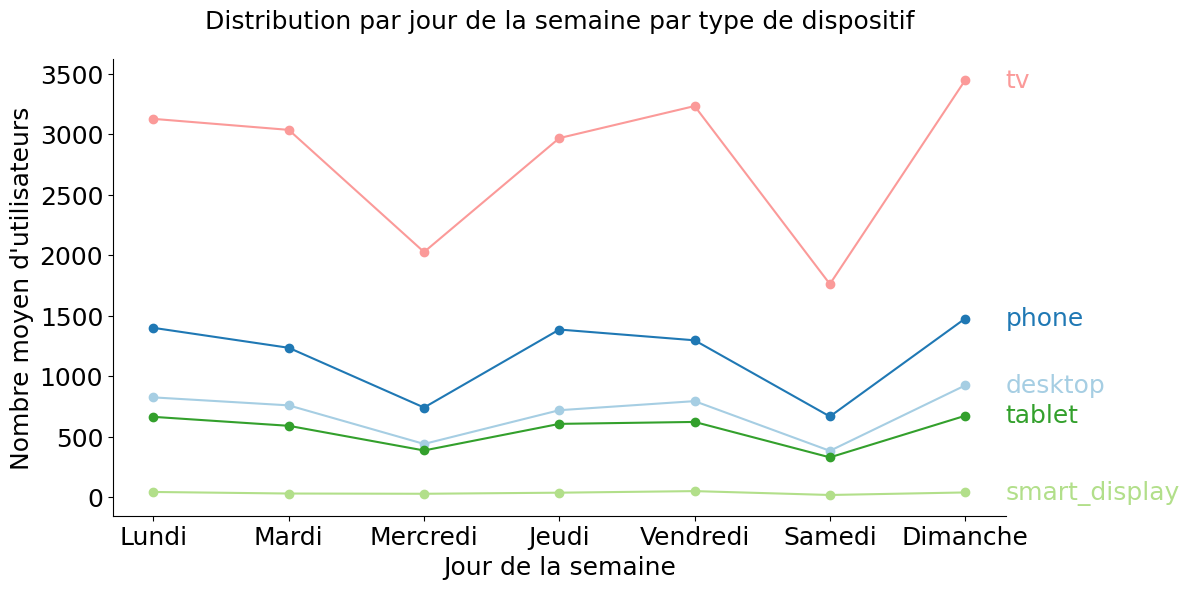

In [33]:
# Set the color palette
sns.set_palette("Paired")

# Calculate the average number of users for each day of the week and device type
daily_avg_users = merged_data.groupby(['Day_of_Week', 'DEVICE_TYPE'])['USER_ID'].nunique()

# Create figure and axes for the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot for distribution per day of the week and device type
for device_type, data in daily_avg_users.groupby(level='DEVICE_TYPE'):
    line = ax.plot(data.index.get_level_values('Day_of_Week'), data.values, marker='o', linestyle='-', label=device_type)
    # Add legend text next to the line with the same color
    last_value = data.values[-1]
    color = line[0].get_color()  # Get color of the line
    ax.text(data.index.get_level_values('Day_of_Week')[-1] + 0.3, last_value, device_type, fontsize=18, color=color, verticalalignment='center', horizontalalignment='left')

ax.set_title('Distribution par jour de la semaine par type de dispositif', fontsize=18, y=1.05)
ax.set_xlabel('Jour de la semaine', fontsize=18)
ax.set_ylabel('Nombre moyen d\'utilisateurs', fontsize=18)
ax.set_xticks(range(7))
ax.set_xticklabels(['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche'], fontsize=18)
ax.tick_params(axis='y', labelsize=18)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()



### Asset types count by device type


In [34]:
import plotly.express as px

# View count for each content type and device type
content_views = merged_data.groupby(['ASSET_TYPE', 'DEVICE_TYPE']).size().reset_index(name='count')

# Number of views for each device type and the overall total views
total_views_per_device = content_views.groupby('DEVICE_TYPE')['count'].sum()
total_views = total_views_per_device.sum()

# Calculate the percentage of each content type relative to its device's total and the overall total views
content_views['Percentage_Device'] = content_views.apply(lambda row: f"{(row['count'] / total_views_per_device[row['DEVICE_TYPE']] * 100):.2f}%", axis=1)
content_views['Percentage_Total'] = content_views.apply(lambda row: f"{(row['count'] / total_views * 100):.2f}%", axis=1)

# Sort the results in descending order based on view count and device type
content_views_sorted = content_views.sort_values(by=['DEVICE_TYPE', 'count'], ascending=[True, False])

custom_color_scale = [
    [0.0, 'rgb(255, 266, 128)'],
    [0.5, 'rgb(255, 230, 0)'],
    [1.0, 'rgb(255, 134, 0)']
]



# Create the Sunburst Plot using Plotly Express
fig = px.sunburst(content_views_sorted,
                  path=['DEVICE_TYPE', 'ASSET_TYPE'],
                  values='count',
                  title='Top 10 Vues de contenu par type de dispositif',
                  color='count',  # Color by view count
                  color_continuous_scale=custom_color_scale,  # Color scale
                  branchvalues='total',  # 'total' to show total views at each level
                  labels={'count': 'Views', 'DEVICE_TYPE': 'Device Type', 'ASSET_TYPE': 'Asset Type'})  # Add labels

fig.update_layout(font=dict(size=18))  # Tamaño de fuente deseado

# Show the plot
fig.show()


In [35]:
content_views.head()

,ASSET_TYPE,DEVICE_TYPE,count,Percentage_Device,Percentage_Total
0,bookmark,desktop,389,1.14%,0.16%
1,bookmark,phone,651,1.88%,0.27%
2,bookmark,tablet,398,2.05%,0.17%
3,bookmark,tv,2229,1.51%,0.94%
4,continue_watching,desktop,210,0.61%,0.09%


In [36]:
# Sort the device types by total views from highest to lowest
sorted_device_types = total_views_per_device.sort_values(ascending=False).index

# Select the top 10 most viewed content types for each device type
top_content_per_device = content_views_sorted.groupby('DEVICE_TYPE').head(15)

# Display these results in a table, dividing it into sections for each device type
for device_type in sorted_device_types:
    data = top_content_per_device[top_content_per_device['DEVICE_TYPE'] == device_type]
    total_views_device = total_views_per_device[device_type]
    print(f"Top 10 Content for {device_type} (Total Views: {total_views_device}):")
    print(data[['ASSET_TYPE', 'count', 'Percentage_Device', 'Percentage_Total']].to_string(index=False))
    print("\n")


Top 10 Content for tv (Total Views: 147862):
       ASSET_TYPE  count Percentage_Device Percentage_Total
             live 132323            89.49%           55.79%
              vod   7714             5.22%            3.25%
           replay   5005             3.38%            2.11%
         bookmark   2229             1.51%            0.94%
continue_watching    591             0.40%            0.25%


Top 10 Content for phone (Total Views: 34704):
       ASSET_TYPE  count Percentage_Device Percentage_Total
             live  28850            83.13%           12.16%
              vod   3347             9.64%            1.41%
           replay   1491             4.30%            0.63%
         bookmark    651             1.88%            0.27%
continue_watching    365             1.05%            0.15%


Top 10 Content for desktop (Total Views: 34176):
       ASSET_TYPE  count Percentage_Device Percentage_Total
             live  30716            89.88%           12.95%
              v

### Program kind count by device type


In [37]:
# Calculate the view count for each program type and device type
content_views = merged_data.groupby(['DEVICE_TYPE', 'PROGRAM_KIND']).size().reset_index(name='count')

# Calculate the total number of views for each device type and the overall total views
total_views_per_device = content_views.groupby('DEVICE_TYPE')['count'].sum()
total_views = total_views_per_device.sum()

# Calculate the percentage of each content type relative to its device's total and the overall total views
content_views['Percentage_Device'] = content_views.apply(lambda row: row['count'] / total_views_per_device[row['DEVICE_TYPE']] * 100, axis=1)
content_views['Percentage_Total'] = content_views.apply(lambda row: row['count'] / total_views * 100, axis=1)

# Sort the results in descending order
content_views_sorted = content_views.sort_values(by=['DEVICE_TYPE', 'count'], ascending=[True, False])

# Select the top 10 most viewed content types for each device type
top_content_per_device = content_views_sorted.groupby('DEVICE_TYPE').head(10)

custom_color_scale = [
    [0.0, 'rgb(255, 266, 128)'],
    [0.5, 'rgb(255, 230, 0)'],
    [1.0, 'rgb(255, 134, 0)']
]

# Create the Sunburst Plot
fig = px.sunburst(top_content_per_device,
                  path=['DEVICE_TYPE', 'PROGRAM_KIND'],
                  values='count',
                  title='Top 10 Program Kind Views by Device Type',
                  color='count',
                  color_continuous_scale = custom_color_scale,
                  branchvalues='total',
                  labels={'count': 'Views', 'DEVICE_TYPE': 'Device Type', 'PROGRAM_KIND': 'Program Kind'})  # Add labels)

fig.update_layout(font=dict(size=18))  # Tamaño de fuente deseado

# Plot graph
fig.show()


In [38]:
# Sort the results
content_views_sorted = content_views.sort_values(by=['DEVICE_TYPE', 'count'], ascending=[True, False])

# Select the top 10 most viewed content types for each device type
top_content_per_device = content_views_sorted.groupby('DEVICE_TYPE').head(10)

# Display results
for device_type in sorted_device_types:
    data = top_content_per_device[top_content_per_device['DEVICE_TYPE'] == device_type]
    total_views_device = total_views_per_device[device_type]
    print(f"Top 10 Program Kind for {device_type} (Total Views: {total_views_device}):")
    # Format the percentages with 2 decimals and include the '%' symbol
    data['Percentage_Device'] = data['Percentage_Device'].apply(lambda x: f"{x:.2f}%")
    data['Percentage_Total'] = data['Percentage_Total'].apply(lambda x: f"{x:.2f}%")
    print(data[['PROGRAM_KIND', 'count', 'Percentage_Device', 'Percentage_Total']].to_string(index=False))
    print("\n")



Top 10 Program Kind for tv (Total Views: 147863):
 PROGRAM_KIND  count Percentage_Device Percentage_Total
 Informations  62673            42.39%           26.42%
       Séries  24827            16.79%           10.47%
        Films  15011            10.15%            6.33%
Documentaires  12959             8.76%            5.46%
      Enfants  12798             8.66%            5.40%
        Sport  10878             7.36%            4.59%
  Indéterminé   5075             3.43%            2.14%
      Culture   3642             2.46%            1.54%


Top 10 Program Kind for phone (Total Views: 34706):
 PROGRAM_KIND  count Percentage_Device Percentage_Total
 Informations  15280            44.03%            6.44%
       Séries   5031            14.50%            2.12%
        Sport   4963            14.30%            2.09%
        Films   3454             9.95%            1.46%
Documentaires   3020             8.70%            1.27%
      Enfants   1366             3.94%            0.58%


# TV regular users statts

In [39]:
# Identify users who never watch on TV and those who watch regularly
never_watch_tv_users = watch_data[watch_data['DEVICE_TYPE'] != 'tv']['USER_ID'].unique()
tv_watchers = watch_data[watch_data['DEVICE_TYPE'] == 'tv']['USER_ID'].unique()

# Calculate the total number of users
watch_users = len(watch_data['USER_ID'].unique())

# Calculate the percentage of each group relative to the total number of users
percentage_never_watch_tv = (len(never_watch_tv_users) / watch_users) * 100
percentage_tv_watchers = (len(tv_watchers) / watch_users) * 100

# Print summary of findings
print(f"Number of users who never watch on TV: {len(never_watch_tv_users)} ({percentage_never_watch_tv:.2f}%)")
print(f"Number of users who have watched on TV: {len(tv_watchers)} ({percentage_tv_watchers:.2f}%)")


Number of users who never watch on TV: 7035 (56.60%)
Number of users who have watched on TV: 6661 (53.59%)


In [40]:
# Convert 'DATE_DAY' to datetime format
watch_data['DATE_DAY'] = pd.to_datetime(watch_data['DATE_DAY'])

# Extract month from the 'DATE_DAY' column
watch_data['MONTH'] = watch_data['DATE_DAY'].dt.to_period('M')

# Filter to include only the last 6 months
last_6_months = pd.PeriodIndex(watch_data['MONTH'].unique())[-9:]

# Filter the watch data for the last 6 months
watch_data_last_6_months = watch_data[watch_data['MONTH'].isin(last_6_months)]

# Filter watch data for tv users
tv_users_over_4_hours = watch_data_last_6_months[watch_data_last_6_months['DEVICE_TYPE'] == 'tv']

# Filter to include only users who watched at least 4 hours per month in all 6 months
tv_users_over_4_hours = tv_users_over_4_hours.groupby(['USER_ID', 'MONTH']).filter(lambda x: (x['DURATION'].sum() >= 6*60*60))

# Retrieve the unique users who watched at least 4 hours per month in all 6 months
tv_unique_users_over_4_hours = tv_users_over_4_hours['USER_ID'].unique()

# Calculate the total number of users
total_users = total_users
total_tv_regular_users = len(tv_unique_users_over_4_hours)
total_tv_users = len(watch_data[watch_data['DEVICE_TYPE'] == 'tv']['USER_ID'].unique())

# Calculate percentage of selected users
regular_tv_users_percentage = round((total_tv_regular_users / total_users) * 100, 2)
regular_tv_users_tv_percentage = round((total_tv_regular_users / total_tv_users) * 100, 2)

# Print the count and percentage of selected users
print("Users who watched at least 6 hours of television each month in the last 3 months of data:")
print("Count:", total_tv_regular_users)
print("Percentage of users: ", regular_tv_users_percentage, "%")
print("Percentage of TV users: ", regular_tv_users_tv_percentage, "%")


Users who watched at least 6 hours of television each month in the last 3 months of data:
Count: 1439
Percentage of users:  3.41 %
Percentage of TV users:  21.6 %


### Create AGE and AGE GROUP columns for comparing

In [41]:
# Define age ranges for grouping
age_ranges = [(0, 18), (18, 25), (25, 35), (35, 45), (45, 60), (60, 95)]

# Define age labels
age_labels = ["0-18 years", "18-25 years", "25-35 years", "35-45 years", "45-60 years", "60-95 years"]

# Filter for Valid Birthdays
users_data_cleaned = users_data[users_data['BIRTHDAY'].notna()]

# Calculate Age in Years
users_data_cleaned['AGE'] = (pd.to_datetime('now') - pd.to_datetime(users_data_cleaned['BIRTHDAY'])).dt.days // 365

# Filter for valid ages (considering age <= 95)
users_data_cleaned = users_data_cleaned[users_data_cleaned['AGE'] <= 95]

# Create 'AGE_GROUP' column based on age ranges and labels
users_data_cleaned['AGE_GROUP'] = pd.cut(users_data_cleaned['AGE'], bins=[x[0] for x in age_ranges] + [95], labels=age_labels)


# Total Users and Unique Watchers
# Total users: total_users
# Unique watchers: unique_users_watch_list
# Total unique watchers: unique_users_watch



## Create groups for analyzing distributions and differences

### Program kind, watch days, age groups

In [42]:
# Filter regular TV users and users that never watched in TV
regular_tv_users = tv_users_over_4_hours

# Filter users that never watched TV
all_users = set(watch_data['USER_ID'])
tv_users = set(watch_data[watch_data['DEVICE_TYPE'] == 'tv']['USER_ID'])
non_tv_users_aux = all_users - tv_users
non_tv_users = watch_data[watch_data['USER_ID'].isin(non_tv_users_aux)]

# Program kind by type of user
non_tv_program_counts = non_tv_users['PROGRAM_KIND'].value_counts()
regular_tv_program_counts = regular_tv_users['PROGRAM_KIND'].value_counts()

# Watch days by type of user

weekday_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

non_tv_weekday_counts = watch_data[watch_data['USER_ID'].isin(non_tv_users['USER_ID'])]['DATE_DAY'].dt.dayofweek.value_counts().rename(weekday_mapping)
regular_tv_weekday_counts = watch_data[watch_data['USER_ID'].isin(regular_tv_users['USER_ID'])]['DATE_DAY'].dt.dayofweek.value_counts().rename(weekday_mapping)

# Number of users by age group
non_tv_users_age_group_distribution = users_data_cleaned[users_data_cleaned['ID'].isin(non_tv_users['USER_ID'])]['AGE_GROUP'].value_counts()
regular_tv_consumers_age_group_distribution = users_data_cleaned[users_data_cleaned['ID'].isin(regular_tv_users['USER_ID'])]['AGE_GROUP'].value_counts()


### Viewing duration

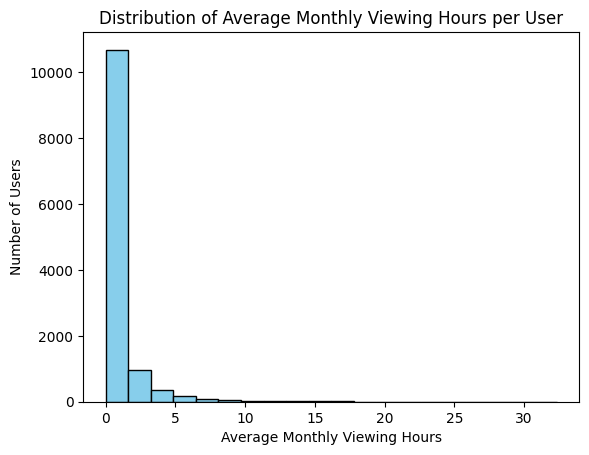

In [43]:
# Avg viewing duration time per user per month
total_duration_per_user = watch_data.groupby('USER_ID')['DURATION'].sum()
average_hours_per_month_per_user = (total_duration_per_user /3600 ) /(12)

# Plot results
plt.hist(average_hours_per_month_per_user, bins=20, color='skyblue', edgecolor='black')

plt.title('Distribution of Average Monthly Viewing Hours per User')
plt.xlabel('Average Monthly Viewing Hours')
plt.ylabel('Number of Users')


plt.show()


In [44]:
tv_watch_data = watch_data[watch_data['DEVICE_TYPE'] == 'tv']

# Average viewing duration per user in seconds
avg_duration_regular = regular_tv_users['DURATION'].mean()
avg_duration_non_tv = non_tv_users['DURATION'].mean()
avg_duration_tv = tv_watch_data['DURATION'].mean()
avg_duration = watch_data['DURATION'].mean()

# Convert to minutes
avg_duration_regular_minutes = int(avg_duration_regular / 60)
avg_duration_non_tv_minutes = int(avg_duration_non_tv / 60)
avg_duration_tv_minutes = int(avg_duration_tv / 60)
avg_duration_minutes = int(avg_duration / 60)

print("Average viewing duration for regular users:", avg_duration_regular_minutes, "minutes")
print("Average viewing duration for non-tv users:", avg_duration_non_tv_minutes, "minutes")
print("Average viewing duration tv users:", avg_duration_tv_minutes, "minutes")
print("Average viewing all users:", avg_duration_minutes, "minutes")


Average viewing duration for regular users: 48 minutes
Average viewing duration for non-tv users: 22 minutes
Average viewing duration tv users: 36 minutes
Average viewing all users: 31 minutes


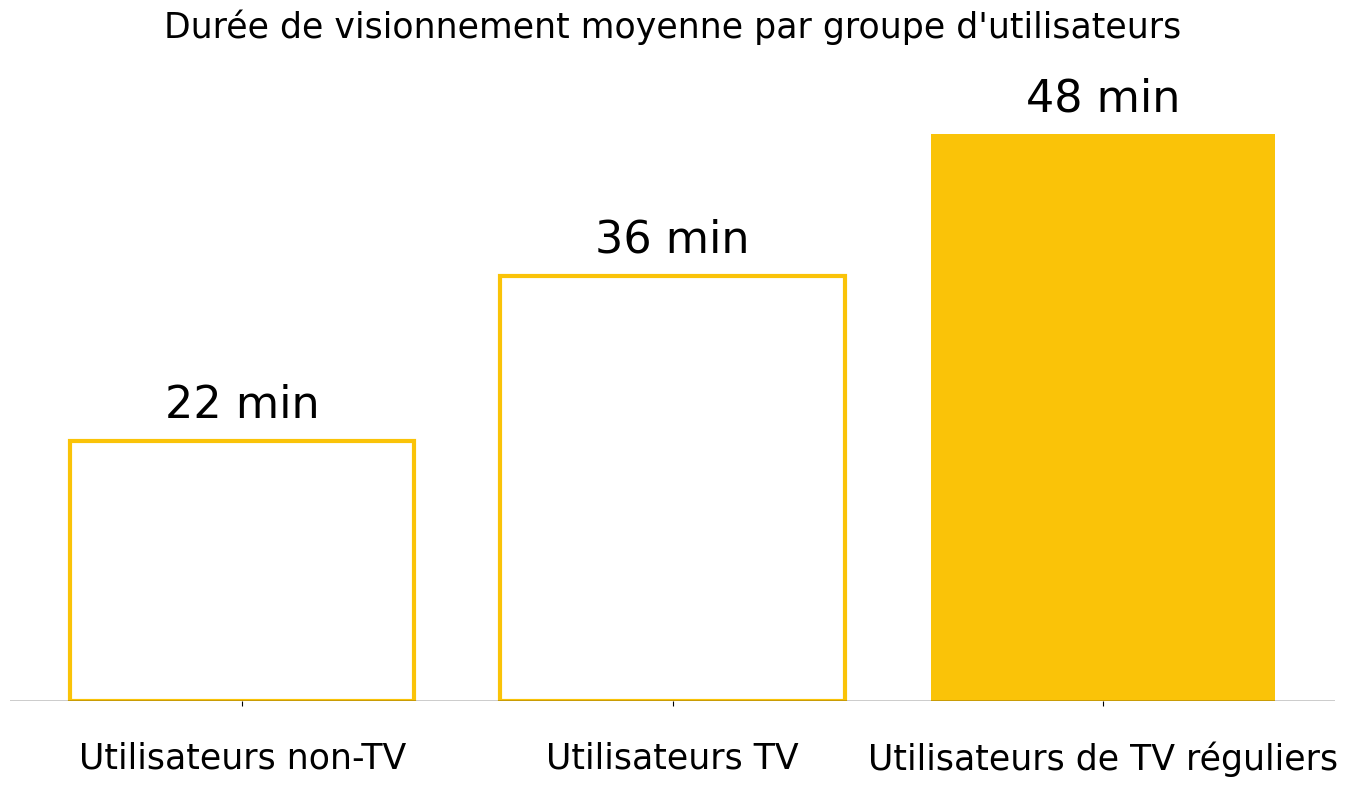

In [87]:

# Create list
avg_durations = [avg_duration_non_tv_minutes,avg_duration_tv_minutes,avg_duration_regular_minutes]
labels = ['Utilisateurs non-TV', 'Utilisateurs TV', 'Utilisateurs de TV réguliers']

# Create graph
plt.figure(figsize=(14, 8))

# Create not filled bars
for i in range(0, len(labels)-1):
    plt.bar(labels[i], avg_durations[i], color='none', edgecolor='#fac308ff', linewidth=3)

# Create filled bar
plt.bar(labels[2], avg_durations[2], color='#fac308ff', linewidth=0)

# Duration
for i, duration in enumerate(avg_durations):
    plt.text(i, duration + 2, f'{duration} min', ha='center', fontsize=32)

# Other adjustements
plt.grid(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.box(False)

plt.axhline(color='black', linewidth=1)

plt.ylabel('Durée de visionnement moyenne', fontsize=25)
plt.title('Durée de visionnement moyenne par groupe d\'utilisateurs', fontsize=25, y=1.1)

# Show graph
plt.xticks(range(len(labels)), labels, fontsize=25, y=-0.05)
plt.tight_layout()
plt.show()




### Viewing frequency

In [46]:
# Calculate the total number of viewing events
total_regular_viewing_events = len(regular_tv_users)
total_non_regular_viewing_events = len(non_tv_users)

# Calculate  unique users
total_unique_users_regular = len(regular_tv_users['USER_ID'].unique())
total_unique_users_non_tv = len(non_tv_users['USER_ID'].unique())

# Calcular la frecuencia promedio de visualización por usuario
average_frequency_per_user_regular = total_regular_viewing_events / total_unique_users_regular
average_frequency_per_user_non_tv = total_non_regular_viewing_events / total_unique_users_non_tv

# Determine the minimum and maximum dates in the 'DATE_DAY' column
start_date = watch_data['DATE_DAY'].min()
end_date = watch_data['DATE_DAY'].max()
dataset_duration = end_date - start_date
num_months = (end_date.year - start_date.year) * 12 + (end_date.month - start_date.month) + 1

# Calculate  avg frequency of viewing per week
average_frequency_per_user_per_month_regular = round(average_frequency_per_user_regular / num_months,2)
average_frequency_per_user_per_month_non_tv = round(average_frequency_per_user_non_tv / num_months,2)

print("Average frequency of viewing per month for regular users:", average_frequency_per_user_per_month_regular)
print("Average frequency of viewing per month for non-regular users:", average_frequency_per_user_per_month_non_tv)

Average frequency of viewing per month for regular users: 2.61
Average frequency of viewing per month for non-regular users: 1.06


In [47]:
# Calcular el número total de visualizaciones
total_viewing_events = len(watch_data)

# Calcular el número total de usuarios únicos
total_unique_users = len(watch_data['USER_ID'].unique())

# Calcular la frecuencia promedio de visualización por usuario
average_frequency_per_user = total_viewing_events / total_unique_users

# Dividir la frecuencia promedio de visualización por usuario por la duración total del conjunto de datos en meses
average_frequency_per_user_per_month = average_frequency_per_user / num_months

print("Average frequency of viewing per month per user in the watch data table:", average_frequency_per_user_per_month)


Average frequency of viewing per month per user in the watch data table: 1.5904001394587925


## Create visualizations

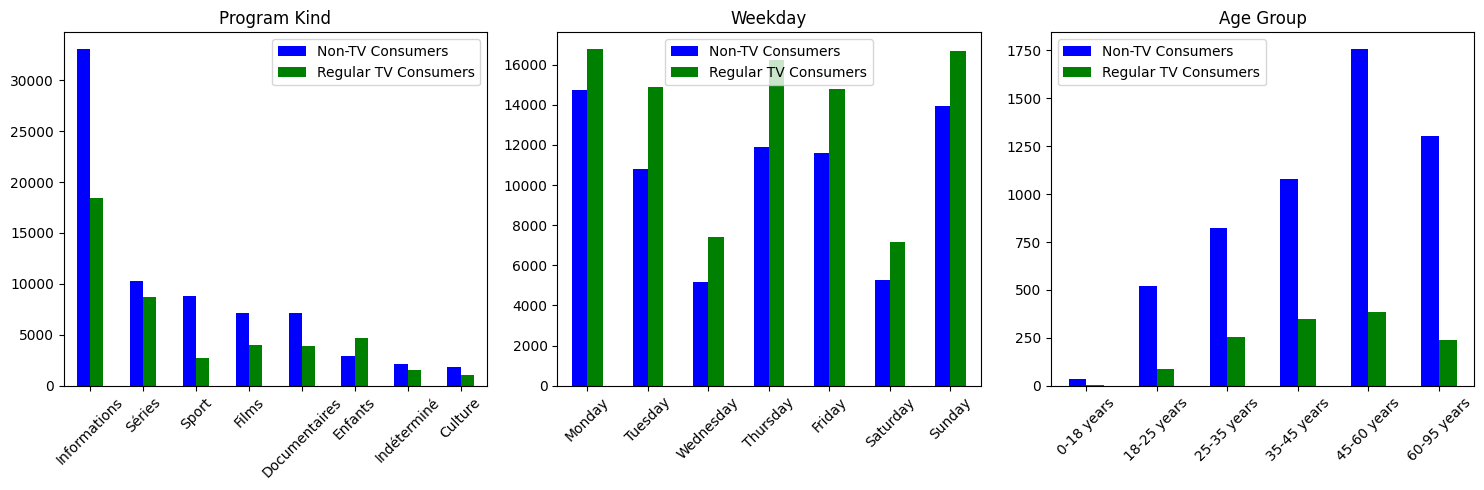

In [48]:
# Order days
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
non_tv_weekday_counts = non_tv_weekday_counts.reindex(weekday_order)
regular_tv_weekday_counts = regular_tv_weekday_counts.reindex(weekday_order)

# Order ages
age_group_order = ['0-18 years', '18-25 years', '25-35 years', '35-45 years', '45-60 years', '60-95 years']
non_tv_users_age_group_distribution = non_tv_users_age_group_distribution.reindex(age_group_order)
regular_tv_consumers_age_group_distribution = regular_tv_consumers_age_group_distribution.reindex(age_group_order)

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# PROGRAM_KIND
program_kind_df = pd.concat([non_tv_program_counts, regular_tv_program_counts], axis=1, keys=['Non-TV Consumers', 'Regular TV Consumers'])
program_kind_df.plot(kind='bar', ax=axs[0], color=['blue', 'green'], title='Program Kind', rot=45)

# WEEKDAY
weekday_df = pd.concat([non_tv_weekday_counts, regular_tv_weekday_counts], axis=1, keys=['Non-TV Consumers', 'Regular TV Consumers'])
weekday_df.plot(kind='bar', ax=axs[1], color=['blue', 'green'], title='Weekday', rot=45)

# AGE_GROUP
age_group_df = pd.concat([non_tv_users_age_group_distribution, regular_tv_consumers_age_group_distribution], axis=1, keys=['Non-TV Consumers', 'Regular TV Consumers'])
age_group_df.plot(kind='bar', ax=axs[2], color=['blue', 'green'], title='Age Group', rot=45)

# Plot
plt.tight_layout()
plt.show()


## Age distribution

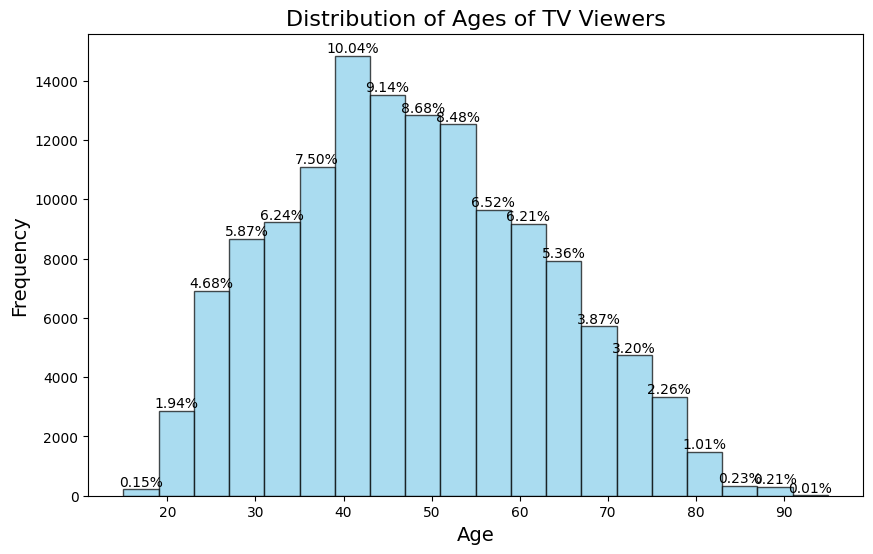

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

# Filtrar los datos de watch_data para incluir solo usuarios que están viendo televisión
tv_watchers = watch_data[watch_data['DEVICE_TYPE'] == 'tv']

# Unir los datos filtrados con la tabla de usuarios para obtener las edades
tv_watchers_with_age = pd.merge(tv_watchers, users_data_cleaned, left_on='USER_ID', right_on='ID', how='left')

# Obtener las edades de los usuarios que miran televisión
tv_watchers_age = tv_watchers_with_age['AGE']

# Crear el histograma
plt.figure(figsize=(10, 6))
hist = plt.hist(tv_watchers_age, bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Calcular porcentaje de personas en cada rango de edades
n = len(tv_watchers_age)
bin_edges = hist[1]
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
bin_widths = bin_edges[1:] - bin_edges[:-1]
percentage = [(count / n) * 100 for count in hist[0]]

# Agregar etiquetas a las barras
for center, count, width, percent in zip(bin_centers, hist[0], bin_widths, percentage):
    plt.text(center, count + 0.5, f'{percent:.2f}%', ha='center', va='bottom', fontsize=10)

# Agregar etiquetas y título
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Ages of TV Viewers', fontsize=16)

# Mostrar el histograma
plt.show()



Age Distribution for All Users (Percentage)

Age Group | Users (%)
0-18 years    | 1.13%
18-25 years   | 15.20%
25-35 years   | 20.73%
35-45 years   | 20.34%
45-60 years   | 25.47%
60-95 years   | 17.13%

Average Age by Device Type:
DEVICE_TYPE
desktop          52.16
phone            48.28
smart_display    54.91
tablet           55.84
tv               47.61
Name: AGE, dtype: float64

Average Age of watchers:
49.11

Age Distribution for Tv Users (Percentage)

Age Group | Users (%)
0-18 years    | 0.16%
18-25 years   | 5.73%
25-35 years   | 16.69%
35-45 years   | 25.15%
45-60 years   | 30.95%
60-95 years   | 21.32%

Age Distribution for Phone Users (Percentage)

Age Group | Users (%)
0-18 years    | 0.29%
18-25 years   | 5.23%
25-35 years   | 13.40%
35-45 years   | 25.00%
45-60 years   | 37.77%
60-95 years   | 18.31%

Age Distribution for Desktop Users (Percentage)

Age Group | Users (%)
0-18 years    | 0.18%
18-25 years   | 6.72%
25-35 years   | 9.90%
35-45 years   | 15.58%
45-60 years 

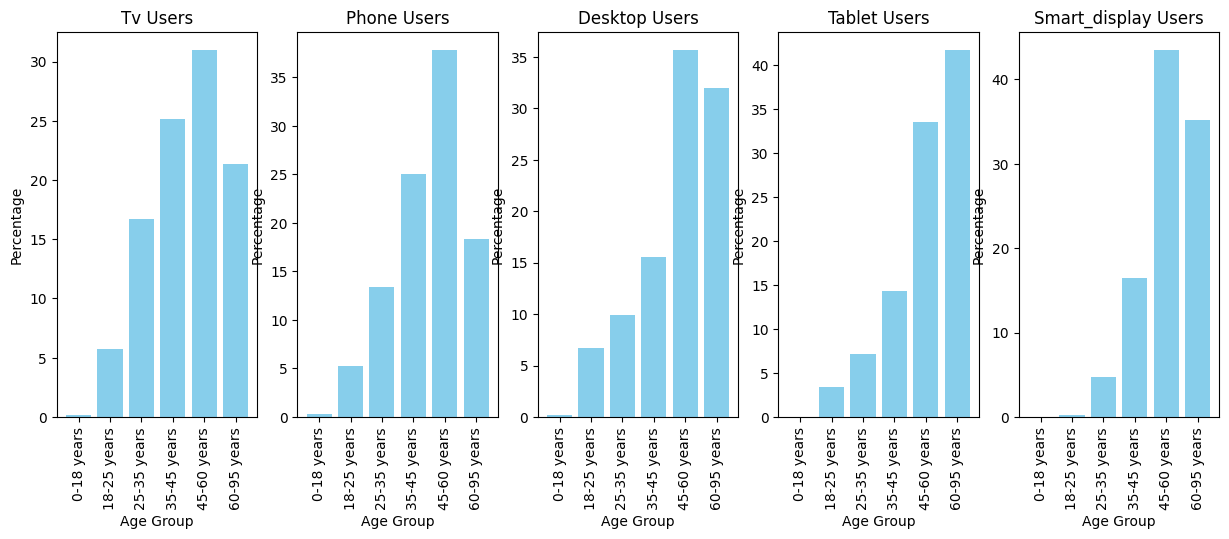

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter for Valid Birthdays
users_data_cleaned = users_data[users_data['BIRTHDAY'].notna()]

# Calculate Age in Years
users_data_cleaned['AGE'] = (pd.to_datetime('now') - pd.to_datetime(users_data_cleaned['BIRTHDAY'])).dt.days // 365

# Filter for valid ages (considering age <= 95)
users_data_cleaned = users_data_cleaned[users_data_cleaned['AGE'] <= 95]

# Define age ranges for grouping
age_ranges = [(0, 18), (18, 25), (25, 35), (35, 45), (45, 60), (60, 95)]

# Define age labels
age_labels = ["0-18 years", "18-25 years", "25-35 years", "35-45 years", "45-60 years", "60-95 years"]

# Create 'AGE_GROUP' column based on age ranges and labels
users_data_cleaned['AGE_GROUP'] = pd.cut(users_data_cleaned['AGE'], bins=[x[0] for x in age_ranges] + [age_ranges[-1][1]], labels=age_labels)

# Merge watch data with user data to include age group information for each view
watch_data_with_age = pd.merge(watch_data, users_data_cleaned[['ID', 'AGE', 'AGE_GROUP']], left_on='USER_ID', right_on='ID', how='left')

# Calculate age distribution for users
age_distribution_users = users_data_cleaned['AGE_GROUP'].value_counts(normalize=True).sort_index() * 100

# Display Results for Users
print("Age Distribution for All Users (Percentage)")
print()
print("Age Group | Users (%)")
for age_group in age_distribution_users.index:
    user_percentage = age_distribution_users.loc[age_group]
    print(f"{age_group:<13} | {user_percentage:.2f}%")

# Calculate the average age for each device type
average_age_by_device = round(watch_data_with_age.groupby('DEVICE_TYPE')['AGE'].mean(),2)
average_age_total_watchers = round(watch_data_with_age['AGE'].mean(),2)
print()
# Display the results
print("Average Age by Device Type:")
print(average_age_by_device)
print()

print("Average Age of watchers:")
print(average_age_total_watchers)

print()
# Calculate and display age distribution for each device type
device_types = watch_data_with_age['DEVICE_TYPE'].dropna().unique()

fig, axs = plt.subplots(1, len(device_types), figsize=(15, 5))

for i, device_type in enumerate(device_types):
    # Filter data for the current device type
    data_for_device_type = watch_data_with_age[watch_data_with_age['DEVICE_TYPE'] == device_type]

    # Calculate age distribution for the current device type
    age_distribution_device_type = (data_for_device_type['AGE_GROUP']
                                    .value_counts(normalize=True)
                                    .sort_index() * 100)

    # Display Results for the current device type
    if isinstance(device_type, str):
        print(f"Age Distribution for {device_type.capitalize()} Users (Percentage)")
        print()
        print("Age Group | Users (%)")
        for age_group in age_distribution_device_type.index:
            device_percentage = age_distribution_device_type.get(age_group, 0)  # Handle missing values
            print(f"{age_group:<13} | {device_percentage:.2f}%")
        print()

        # Plot histogram for the current device type
        axs[i].bar(age_distribution_device_type.index, age_distribution_device_type.values, color='skyblue')
        axs[i].set_title(f'{device_type.capitalize()} Users')
        axs[i].set_xlabel('Age Group')
        axs[i].set_xticklabels(age_distribution_device_type.index, rotation=90, ha = 'center')
        axs[i].set_ylabel('Percentage')

plt.show()

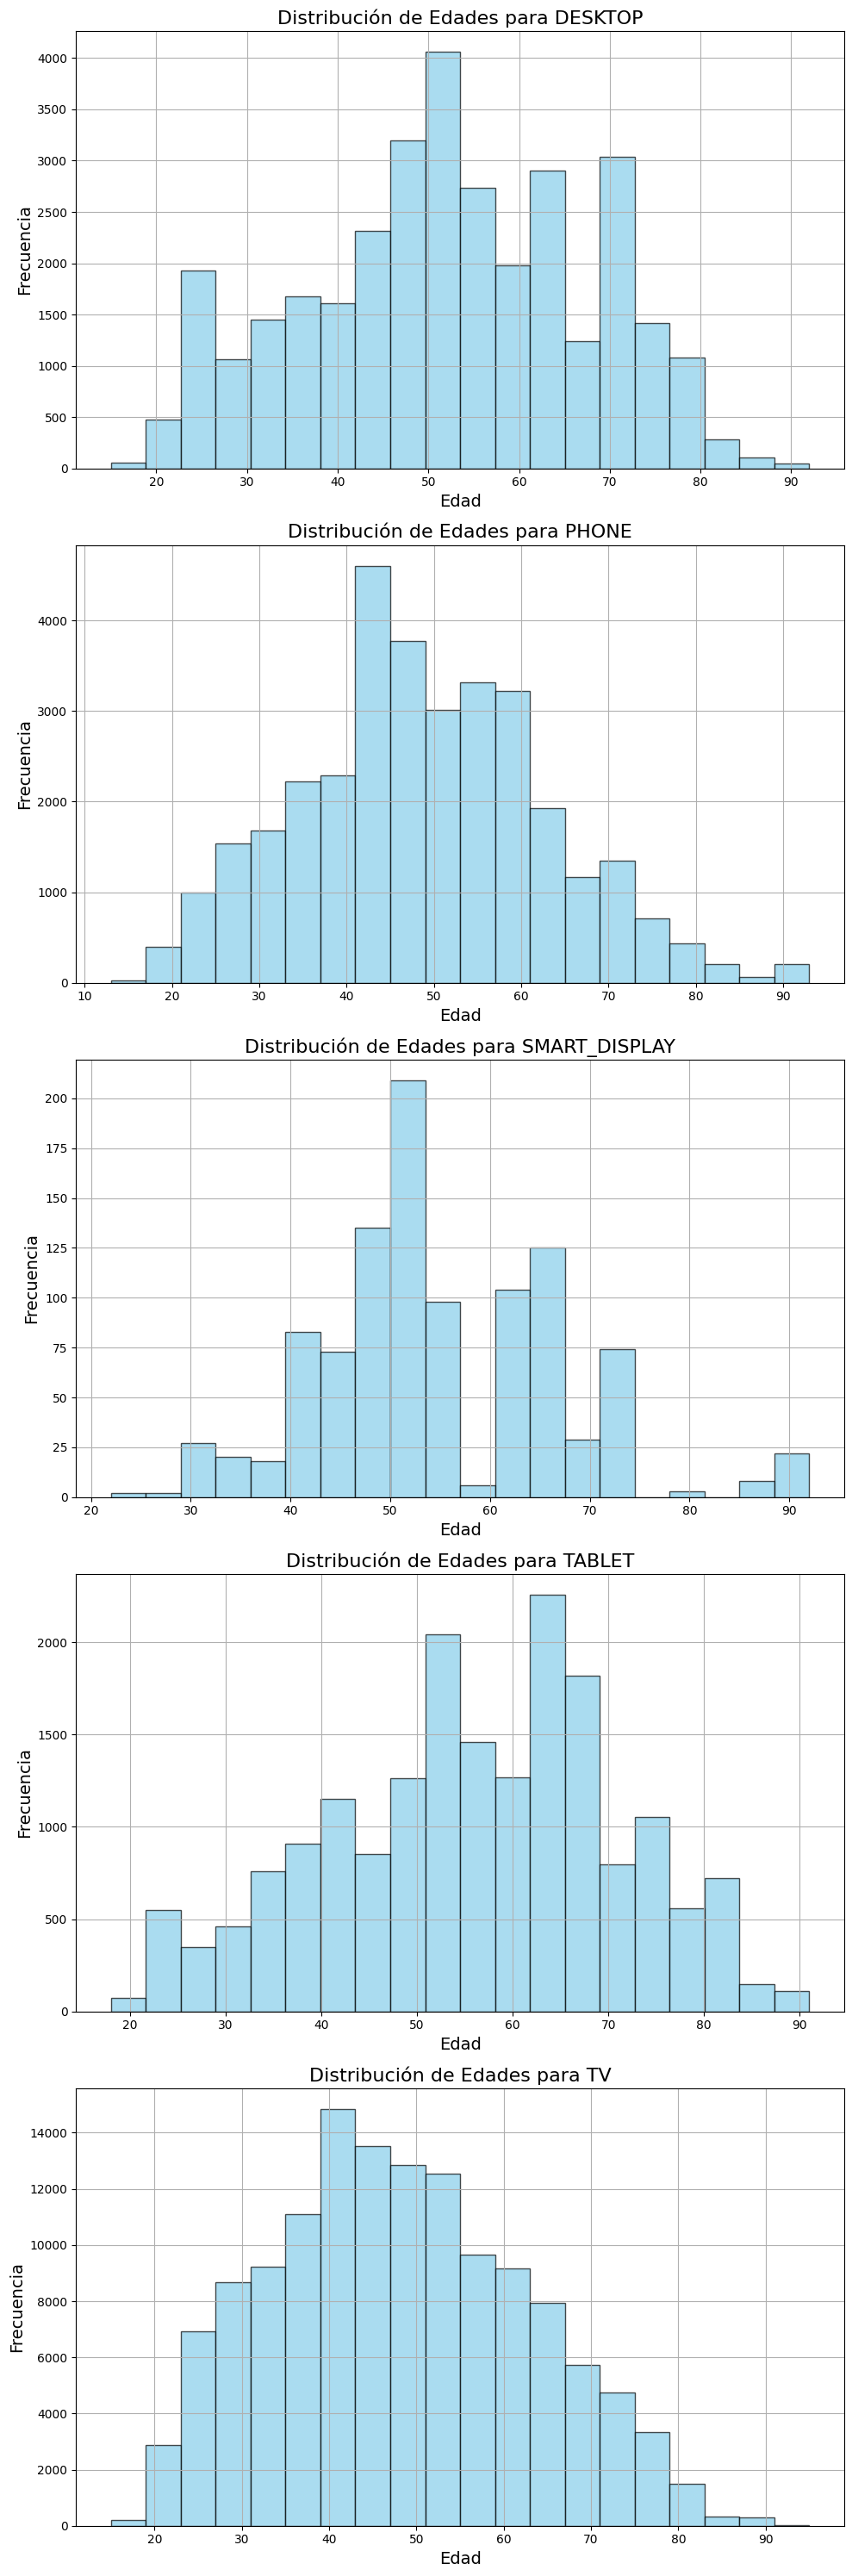

In [51]:
tv_watchers_with_age = pd.merge(watch_data, users_data_cleaned, left_on='USER_ID', right_on = 'ID', how='left')
tv_watchers_age = tv_watchers_with_age['AGE']

# Group the information by device and age
grouped_by_device = tv_watchers_with_age.groupby('DEVICE_TYPE')['AGE']

# Create subplots for each device type
fig, axes = plt.subplots(nrows=len(grouped_by_device), figsize=(10, 6 * len(grouped_by_device)))

for i, (device, ages) in enumerate(grouped_by_device):
    ax = axes[i] if len(grouped_by_device) > 1 else axes  # Manejar el caso de un solo dispositivo
    ax.hist(ages, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    ax.set_xlabel('Edad', fontsize=14)
    ax.set_ylabel('Frecuencia', fontsize=14)
    ax.set_title(f'Distribución de Edades para {device.upper()}', fontsize=16)
    ax.grid(True)

plt.tight_layout()
plt.show()


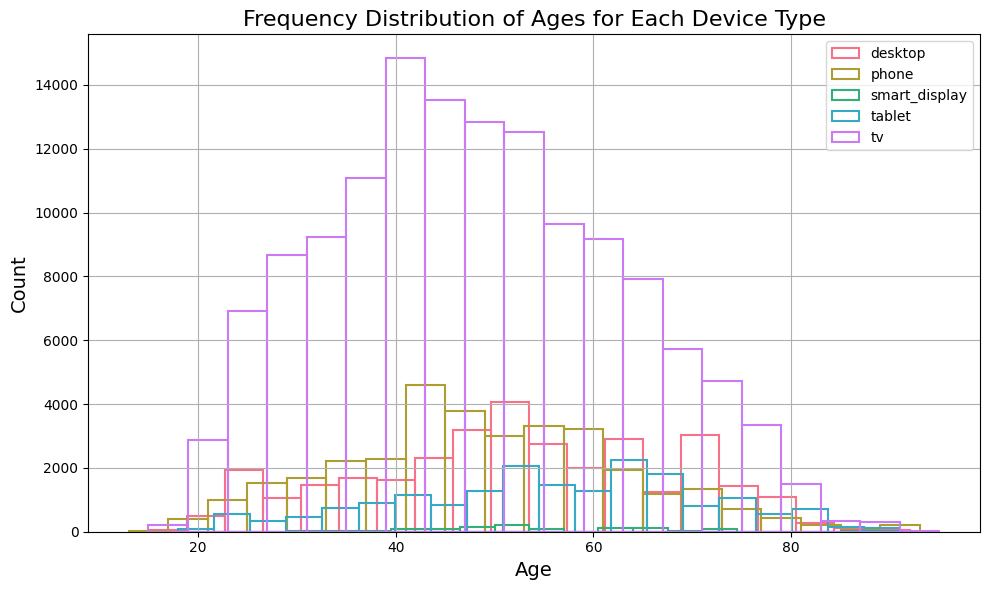

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

tv_watchers_with_age = pd.merge(watch_data, users_data_cleaned, left_on='USER_ID', right_on='ID', how='left')

# Group the information by device and age
grouped_by_device = tv_watchers_with_age.groupby('DEVICE_TYPE')['AGE']

# Create subplots for each device type
fig, ax = plt.subplots(figsize=(10, 6))

# Define a color palette for each device type
palette = sns.color_palette('husl', n_colors=len(grouped_by_device))

for i, (device, ages) in enumerate(grouped_by_device):
    # Plot the histogram for each device type
    sns.histplot(data=ages, color=palette[i], bins=20, kde=False, stat='count', fill=False, line_kws={'linewidth': 2}, ax=ax)

# Labels and title
ax.set_xlabel('Age', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Frequency Distribution of Ages for Each Device Type', fontsize=16)
ax.legend(grouped_by_device.groups.keys())  # Add legend with device types
ax.grid(True)

plt.tight_layout()
plt.show()


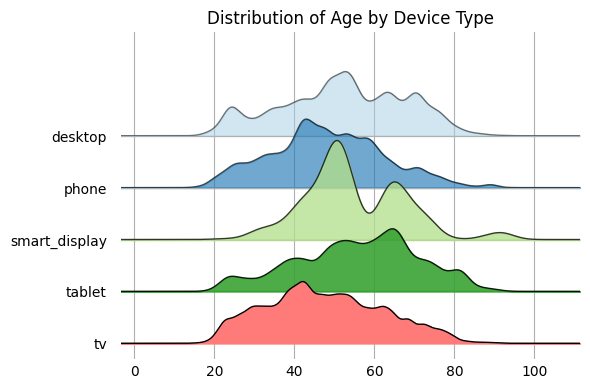

In [53]:
from matplotlib import cm, rcParams
!pip install joypy
import joypy


# Colors
tv_color = '#ff7b7a'
phone_color = '#2078b4'
desktop_color = '#a8cfe4'
tablet_color = '#35a12f'
smart_display_color = '#b2df8a'

# Fusión de los DataFrames 'watch_data' y 'users_data_cleaned' en la columna 'USER_ID'
merged_data = pd.merge(watch_data, users_data_cleaned, left_on='USER_ID', right_on='ID', how='left')

# Agrupar los datos fusionados por 'DEVICE_TYPE' y calcular la media y la desviación estándar de las edades para cada tipo de dispositivo
device_age_stats = merged_data.groupby('DEVICE_TYPE')['AGE'].agg(['mean', 'std'])

# Calcular el tamaño
device_type_counts = watch_data['DEVICE_TYPE'].value_counts()

# Diccionario para almacenar los tamaños
size_by_device_type = {}

# Iteración para asignar tamaños
for device_type, count in device_type_counts.items():
    size_by_device_type[device_type] = count

# Crear un DataFrame para almacenar los valores de loc, scale y size calculados para cada tipo de dispositivo
device_params = pd.DataFrame({
    'DEVICE_TYPE': device_age_stats.index,
    'loc': device_age_stats['mean'],
    'scale': device_age_stats['std'],
    'size': [size_by_device_type.get(device_type, 0) for device_type in device_age_stats.index]
})

# Configuración de los parámetros globales de la fuente
rcParams['font.size'] = 10

colors = [desktop_color, phone_color,smart_display_color  , tablet_color,tv_color]

# Crear el joyplot utilizando los colores específicos para cada dispositivo
fig, ax = joypy.joyplot(data=merged_data, by='DEVICE_TYPE', column='AGE', figsize=(6, 4), grid=True, color=colors,
                        overlap=1, xlim=(10, 90), linecolor='black', linewidth=1,
                        fade=True, background='white',
                        title='Distribution of Age by Device Type')



# Mostrar el joyplot
plt.show()


In [88]:
# Paso 1: Filtrar suscriptores de TV
tv_subscribers_data = subscriptions_data[(subscriptions_data['DEVICE_TYPE'] == 'tv') & (subscriptions_data['SUBSCRIPTION_END_DATE'].isnull())]

# Paso 2: Filtrar usuarios que miran TV
tv_watchers_data = watch_data[(watch_data['DEVICE_TYPE'] == 'tv')]

# Paso 3: Unir con la tabla de datos de usuarios limpiados para obtener edades
tv_subscribers_with_age = pd.merge(tv_subscribers_data, users_data_cleaned[['ID', 'AGE']], left_on='USER_ID', right_on='ID', how='left')
tv_watchers_with_age = pd.merge(tv_watchers_data, users_data_cleaned[['ID', 'AGE']], left_on='USER_ID', right_on='ID', how='left')

# Paso 4: Calcular la edad promedio
average_age_tv_subscribers = tv_subscribers_with_age['AGE'].mean()
average_age_tv_watchers = tv_watchers_with_age['AGE'].mean()

print("Edad promedio de suscriptores de TV:", round(average_age_tv_subscribers, 2))
print("Edad promedio de los que miran TV:", round(average_age_tv_watchers, 2))




KeyError: 'DEVICE_TYPE'

# Users that didn't use the platform

In [54]:
# Verify if all watch_data users are in users_data

# Extract unique USER_IDs from Watch table
watch_data_cleaned = watch_data.dropna(subset=['USER_ID'])

# Check if all users who have viewed content are in the users table
all_users_in_watch = watch_data_cleaned['USER_ID'].isin(users_data['ID']).all()

if all_users_in_watch:
      print("All users who have viewed content are present in the users table.")
else:
      print("Not all users who have viewed content are present in the users table.")

All users who have viewed content are present in the users table.


In [55]:
# Calculate the number of users who have never watched content
num_users_never_watched = total_users - watch_data['USER_ID'].nunique()
num_users_watched = watch_data['USER_ID'].nunique()
# Calculate the percentage of users who have never watched content
percentage_users_never_watched = (num_users_never_watched / total_users) * 100
percentage_users_watched = (num_users_watched / total_users) * 100

# Print results
print("Users that didn't watch any content:", num_users_never_watched)
print("Users that watched content:", num_users_watched)
print("Total users:", total_users)
print("Percentage of users who have never watched content: {:.2f}%".format(percentage_users_never_watched))
print("Percentage of users who have  watched content: {:.2f}%".format(percentage_users_watched))



Users that didn't watch any content: 29818
Users that watched content: 12428
Total users: 42246
Percentage of users who have never watched content: 70.58%
Percentage of users who have  watched content: 29.42%


# Subscriptions analysis

In [56]:
# Read values for subscriptions

print(subscriptions_data['PRODUCT_NAME'].unique())

<StringArray>
['Molotov Plus', 'Molotov Extra', 'Molotov Extended', 'Molotov Giga']
Length: 4, dtype: string


## Users classification by subscription status

Total Users: 42246
Active Subscribers: 3623
Canceled Subscribers: 5145
Never Subscribed: 33478
Percentage of Active Subscribers: 8.58 %
Percentage of Canceled Subscribers: 12.18 %
Percentage of Never Subscribed: 79.25 %



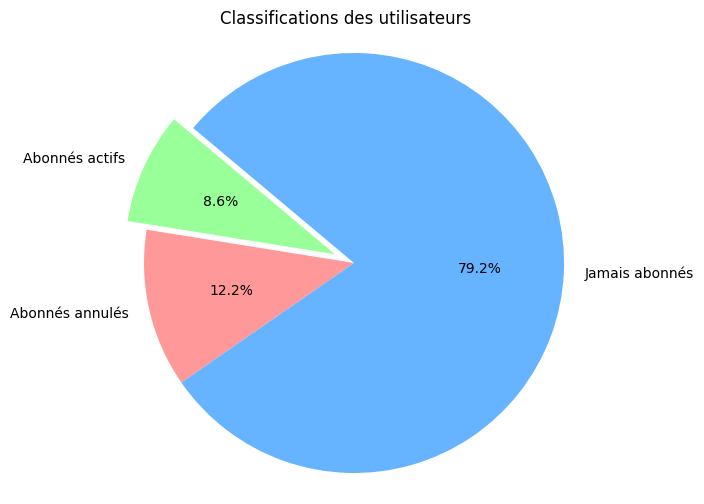

In [57]:
# Total Users total_users

# Total Active Subscribers
active_subscribers_list = subscriptions_data[subscriptions_data['SUBSCRIPTION_END_DATE'].isnull()]['USER_ID'].unique()

# Subscribers Who Canceled
subscribers_canceled_total_list = subscriptions_data[subscriptions_data['SUBSCRIPTION_END_DATE'].notnull()]['USER_ID'].unique()
subscribers_canceled_list = set(subscribers_canceled_total_list) - set(active_subscribers_list)

# Users that never had a subscription
users_never_subscribed_list = set(users_data['ID']) - set(subscriptions_data['USER_ID'])

# Totals
total_subscribers = len(active_subscribers_list)
total_canceled_subscribers = len(subscribers_canceled_list)
total_never_subscribed = len(users_never_subscribed_list)

# Percentages
percentage_active_subscribers = (total_subscribers / total_users) * 100
percentage_canceled_subscribers = (total_canceled_subscribers / total_users) * 100
percentage_never_subscribed = (total_never_subscribed / total_users) * 100

# Mostrar resultados
print("Total Users:", total_users)
print("Active Subscribers:", total_subscribers)
print("Canceled Subscribers:", total_canceled_subscribers)
print("Never Subscribed:", total_never_subscribed)
print("Percentage of Active Subscribers:", round(percentage_active_subscribers, 2), "%")
print("Percentage of Canceled Subscribers:", round(percentage_canceled_subscribers, 2), "%")
print("Percentage of Never Subscribed:", round(percentage_never_subscribed, 2), "%")
print()

# Pie chart data
labels = ['Abonnés actifs', 'Abonnés annulés', 'Jamais abonnés']
sizes = [percentage_active_subscribers, percentage_canceled_subscribers, percentage_never_subscribed]
colors = ['#99ff99', '#ff9999', '#66b3ff']
explode = (0.1, 0, 0)  # Highlight the first slice

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Classifications des utilisateurs')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show pie chart
plt.show()



## Watchers classification by subscription status

Total Watch Records: 237205
Active Subscribers Watch: 2827
Canceled Subscribers Watch: 1896
Never Subscribed Watch: 7705
Percentage of Active Subscribers Watch: 22.75 %
Percentage of Canceled Subscribers Watch: 15.25 %
Percentage of Never Subscribed Watch: 61.99 %



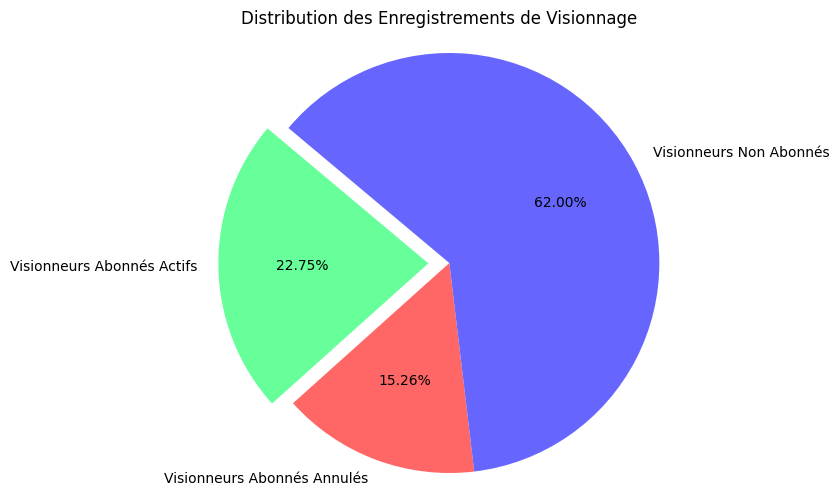

In [58]:
# Total number of records in watch_data
total_watch_records = len(watch_data)

# Users in the watch_data table
watch_users = set(watch_data['USER_ID'])

# Users in watch_data who are Active Subscribers
active_subscribers_watch = len(set(active_subscribers_list) & watch_users)

# Users in watch_data who are Canceled Subscribers
canceled_subscribers_watch = len(set(subscribers_canceled_list) & watch_users)

# Users in watch_data who are Never Subscribed
never_subscribed_watch = len(set(users_never_subscribed_list) & watch_users)

# Percentages
percentage_active_subscribers_watch = (active_subscribers_watch / len(watch_users)) * 100
percentage_canceled_subscribers_watch = (canceled_subscribers_watch / len(watch_users)) * 100
percentage_never_subscribed_watch = (never_subscribed_watch / len(watch_users)) * 100

# Display results
print("Total Watch Records:", total_watch_records)
print("Active Subscribers Watch:", active_subscribers_watch)
print("Canceled Subscribers Watch:", canceled_subscribers_watch)
print("Never Subscribed Watch:", never_subscribed_watch)
print("Percentage of Active Subscribers Watch:", round(percentage_active_subscribers_watch, 2), "%")
print("Percentage of Canceled Subscribers Watch:", round(percentage_canceled_subscribers_watch, 2), "%")
print("Percentage of Never Subscribed Watch:", round(percentage_never_subscribed_watch, 2), "%")
print()

# Define data
labels = ['Visionneurs Abonnés Actifs', 'Visionneurs Abonnés Annulés', 'Visionneurs Non Abonnés']
sizes = [active_subscribers_watch, canceled_subscribers_watch, never_subscribed_watch]
colors = ['#66ff99', '#ff6666', '#6666ff']
explode = (0.1, 0, 0)  # Highlight the first slice

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140)
plt.title('Distribution des Enregistrements de Visionnage')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()



## Comparison between users and watchers in subscriptions

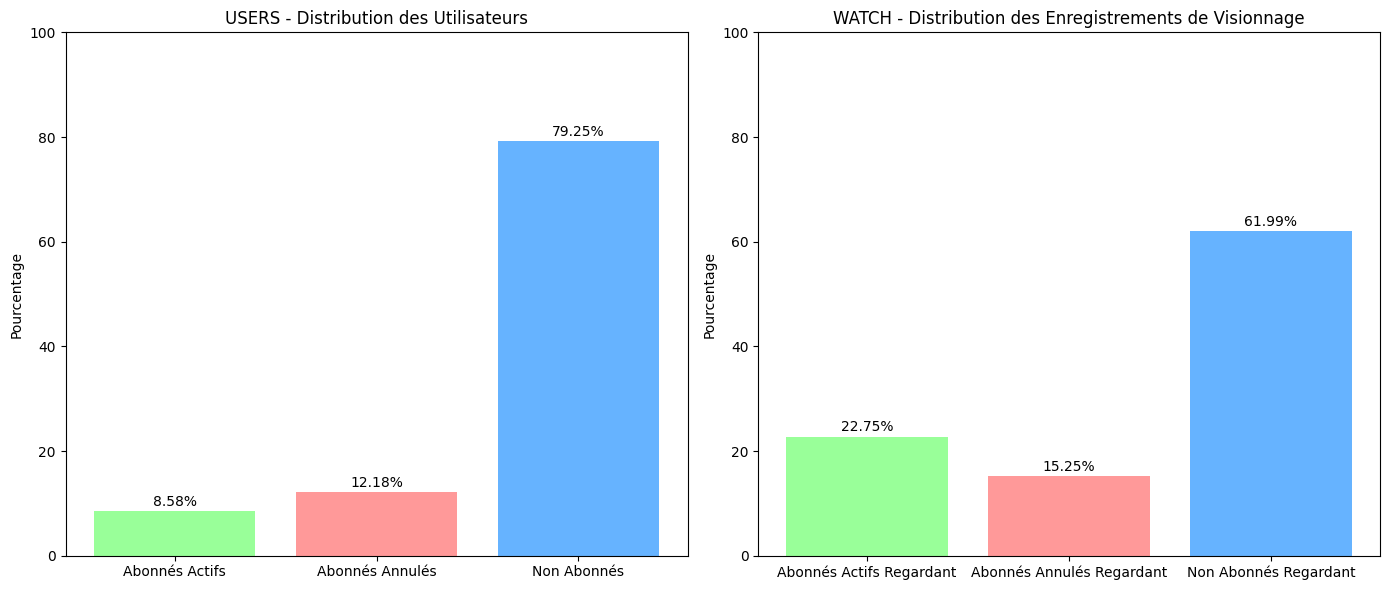

In [59]:
import matplotlib.pyplot as plt

# Data for the first set
user_labels = ['Abonnés Actifs', 'Abonnés Annulés', 'Non Abonnés']
user_sizes = [percentage_active_subscribers, percentage_canceled_subscribers, percentage_never_subscribed]
user_colors = ['#99ff99', '#ff9999', '#66b3ff']

# Data for the second set
watch_labels = ['Abonnés Actifs Regardant', 'Abonnés Annulés Regardant', 'Non Abonnés Regardant']
watch_sizes = [percentage_active_subscribers_watch, percentage_canceled_subscribers_watch, percentage_never_subscribed_watch]
watch_colors = ['#99ff99', '#ff9999', '#66b3ff']  # Same colors as the first chart

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Bar chart for distribution of users
axes[0].bar(user_labels, user_sizes, color=user_colors)
axes[0].set_title('USERS - Distribution des Utilisateurs')
axes[0].set_ylabel('Pourcentage')
axes[0].set_ylim(0, 100)  # Set y-axis limit for percentage range

# Annotate percentages in the bar chart for distribution of users
for i in range(len(user_labels)):
    axes[0].text(i, user_sizes[i] + 1, f'{user_sizes[i]:.2f}%', ha='center')

# Bar chart for distribution of watch records
axes[1].bar(watch_labels, watch_sizes, color=watch_colors)
axes[1].set_title('WATCH - Distribution des Enregistrements de Visionnage')
axes[1].set_ylabel('Pourcentage')
axes[1].set_ylim(0, 100)  # Set y-axis limit for percentage range

# Annotate percentages in the bar chart for distribution of watch records
for i in range(len(watch_labels)):
    axes[1].text(i, watch_sizes[i] + 1, f'{watch_sizes[i]:.2f}%', ha='center')

# Show the plots
plt.tight_layout()
plt.show()



## Type of subscription analysis

In [60]:
# Count the total number of users for each subscription type
total_subscription_counts = subscriptions_data['PRODUCT_NAME'].value_counts()

# Count the number of users who ended a subscription for each subscription type
cancelled_subscription_counts = subscriptions_data[subscriptions_data['SUBSCRIPTION_END_DATE'].notna()]['PRODUCT_NAME'].value_counts()

# Calculate the percentage of users who cancelled each subscription type
cancelled_subscription_percentages = (cancelled_subscription_counts / total_subscription_counts) * 100

# Calculate total subscriptions, cancellations, and active subscriptions
total_subscriptions = len(subscriptions_data)
total_cancellations = subscriptions_data['SUBSCRIPTION_END_DATE'].notna().sum()
total_active_subscriptions = total_subscriptions - total_cancellations

# Calculate percentages
percentage_cancellations = (total_cancellations / total_subscriptions) * 100
percentage_active_subscriptions = (total_active_subscriptions / total_subscriptions) * 100

print()
# Display the results in a table format
print("SUBSCRIPTION TYPE  | TOTAL USERS | CANCELLED USERS | ACTIVE USERS | CANCELLED % | ACTIVE % | ACTIVE % (of total users)")
print("-" * 110)  # Separator line
for subscription_type, total_count in total_subscription_counts.items():
    cancelled_count = cancelled_subscription_counts.get(subscription_type, 0)
    active_count = total_count - cancelled_count
    cancelled_percentage = (cancelled_count / total_count) * 100 if total_count > 0 else 0
    active_percentage = (active_count / total_count) * 100 if total_count > 0 else 0
    active_percentage_of_total_users = (active_count / total_users) * 100
    print(f"{subscription_type:<18} | {total_count:<11} | {cancelled_count:<15} | {active_count:<12} | {cancelled_percentage:>9.2f}% | {active_percentage:>8.2f}% | {active_percentage_of_total_users:>6.2f}%")



SUBSCRIPTION TYPE  | TOTAL USERS | CANCELLED USERS | ACTIVE USERS | CANCELLED % | ACTIVE % | ACTIVE % (of total users)
--------------------------------------------------------------------------------------------------------------
Molotov Plus       | 6477        | 5215            | 1262         |     80.52% |    19.48% |   2.99%
Molotov Extra      | 5049        | 3120            | 1929         |     61.79% |    38.21% |   4.57%
Molotov Giga       | 4454        | 3819            | 635          |     85.74% |    14.26% |   1.50%
Molotov Extended   | 2966        | 2462            | 504          |     83.01% |    16.99% |   1.19%


In [61]:
# Merge Users_data and Subscriptions_data
merged_data = pd.merge(users_data, subscriptions_data, left_on='ID', right_on='USER_ID', how='inner')

# Count the number of users for each subscription type
subscription_counts = merged_data['PRODUCT_NAME'].value_counts()

# Calculate the percentage of users for each subscription type
total_subscribed_users = len(merged_data)
subscription_percentages = (subscription_counts / total_subscribed_users) * 100

# Display the results in a table format
print("SUBSCRIPTION TYPE     |   PERCENTAGE OF USERS")
print("-" * 50)  # Separator line
for subscription_type, count in subscription_counts.items():
    print(f"{subscription_type:<20} | {subscription_percentages[subscription_type]:.2f}%")


SUBSCRIPTION TYPE     |   PERCENTAGE OF USERS
--------------------------------------------------
Molotov Plus         | 34.19%
Molotov Extra        | 26.65%
Molotov Giga         | 23.51%
Molotov Extended     | 15.66%


Subscriptions of TV users
/nSUBSCRIPTION TYPE  |  PERCENTAGE OF USERS
--------------------------------------------------
Molotov Plus         | 37.14%
Molotov Giga         | 23.98%
Molotov Extra        | 20.68%
Molotov Extended     | 18.20%




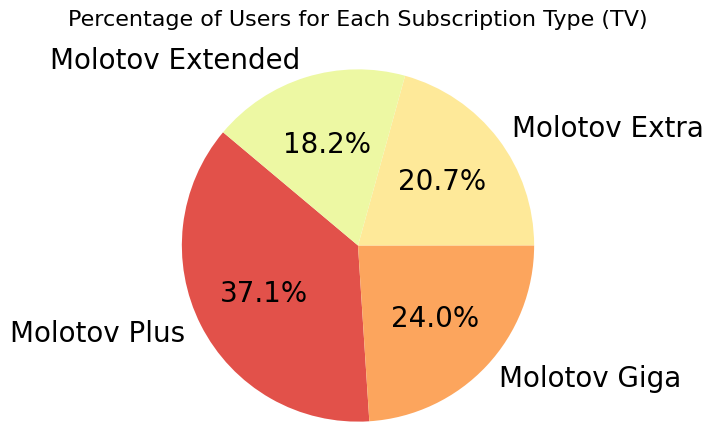

In [62]:

# Set a sober color palette
sns.set_palette("Spectral")

merged_data = pd.merge(watch_data, users_data, left_on='USER_ID', right_on='ID', how='left')
merged_data = pd.merge(merged_data, subscriptions_data, left_on='ID', right_on='USER_ID', how='inner')

# Filter rows in merged_data where DEVICE_TYPE is 'tv'
merged_data_tv = merged_data[merged_data['DEVICE_TYPE'] == 'tv']

# Count the number of users for each subscription type for TV
subscription_counts_tv = merged_data_tv['PRODUCT_NAME'].value_counts()

# Calculate the percentage of users for each subscription type for TV
total_subscribed_users_tv = len(merged_data_tv)
subscription_percentages_tv = (subscription_counts_tv / total_subscribed_users_tv) * 100

# Display the results in a table format
print("Subscriptions of TV users")
print("/nSUBSCRIPTION TYPE  |  PERCENTAGE OF USERS")
print("-" * 50)  # Separator line
for subscription_type, count in subscription_counts_tv.items():
    print(f"{subscription_type:<20} | {subscription_percentages_tv[subscription_type]:.2f}%")
print()
print()
# Plot a pie chart with larger text
plt.figure(figsize=(5, 5))
plt.pie(subscription_counts_tv, labels=subscription_counts_tv.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 20})
plt.title('Percentage of Users for Each Subscription Type (TV)', fontsize=16, pad=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



### How much are subscribed by device type?

In [63]:
# Subscribed users
subscribed_users = subscriptions_data[pd.isnull(subscriptions_data['SUBSCRIPTION_END_DATE'])]['USER_ID']

# Not subscribed
not_subscribed_users = users_data[~users_data['ID'].isin(subscribed_users)]

# Obtain watch data for groups
subscribed_users_watch = watch_data[watch_data['USER_ID'].isin(subscribed_users)]
not_subscribed_users_watch = watch_data[~watch_data['USER_ID'].isin(subscribed_users)]

# Total users by device type
subscribed_users_per_device = subscribed_users_watch.groupby('DEVICE_TYPE')['USER_ID'].nunique()
not_subscribed_users_per_device = not_subscribed_users_watch.groupby('DEVICE_TYPE')['USER_ID'].nunique()

#  RESULTS
print("Subscribed:")
print(subscribed_users_per_device)

print("\n Not subscribed:")
print(not_subscribed_users_per_device)


Subscribed:
DEVICE_TYPE
desktop           496
phone             783
smart_display      15
tablet            386
tv               2266
Name: USER_ID, dtype: int64

 Not subscribed:
DEVICE_TYPE
desktop          1492
phone            3371
smart_display      66
tablet           1185
tv               4395
Name: USER_ID, dtype: int64


In [64]:
# Percentage

subscribed_percentage_per_device = (subscribed_users_per_device / (subscribed_users_per_device + not_subscribed_users_per_device)) * 100
subscribed_percentage_per_device = subscribed_percentage_per_device.round(2)
not_subscribed_percentage_per_device = (not_subscribed_users_per_device / (subscribed_users_per_device + not_subscribed_users_per_device)) * 100
not_subscribed_percentage_per_device = not_subscribed_percentage_per_device.round(2)

# Total users per device
total_users_per_device = subscribed_users_per_device + not_subscribed_users_per_device

# Results
results_table = pd.DataFrame({
    'SUSCRIBED (%)': subscribed_percentage_per_device,
    'NOT SUSCRIBED (%)': not_subscribed_percentage_per_device,
    'TOTAL USERS': total_users_per_device
})

results_table = results_table.sort_values(by='SUSCRIBED (%)', ascending=False)

# Mostrar tabla
print("                  SUSCRIBED - NOT SUSCRIBED")
print(results_table)


                  SUSCRIBED - NOT SUSCRIBED
               SUSCRIBED (%)  NOT SUSCRIBED (%)  TOTAL USERS
DEVICE_TYPE                                                 
tv                     34.02              65.98         6661
desktop                24.95              75.05         1988
tablet                 24.57              75.43         1571
phone                  18.85              81.15         4154
smart_display          18.52              81.48           81


In [65]:
# Filtrar usuarios no suscritos que ven televisión
not_subscribed_tv_watch_data = not_subscribed_users_watch[not_subscribed_users_watch['DEVICE_TYPE'] == 'tv']

# Filtrar las observaciones desde el 1 de agosto de 2023
watch_data_from_august_2023 = not_subscribed_tv_watch_data[pd.to_datetime(not_subscribed_tv_watch_data['DATE_DAY']) >= pd.to_datetime('2023-07-01')]

# Calcular la cantidad de usuarios que han visto más de 10 horas
users_over_20_hours_per_month = watch_data_from_august_2023.groupby('USER_ID').apply(lambda x: (x['DURATION'].sum() / 3600) > 8).sum()

# Resultados
print("Cantidad de usuarios no suscritos que ven TV y han visto más de 10 horas por mes desde agosto de 2023:", users_over_20_hours_per_month)


Cantidad de usuarios no suscritos que ven TV y han visto más de 10 horas por mes desde agosto de 2023: 357


## Subscriptions and cancellation analysis by date

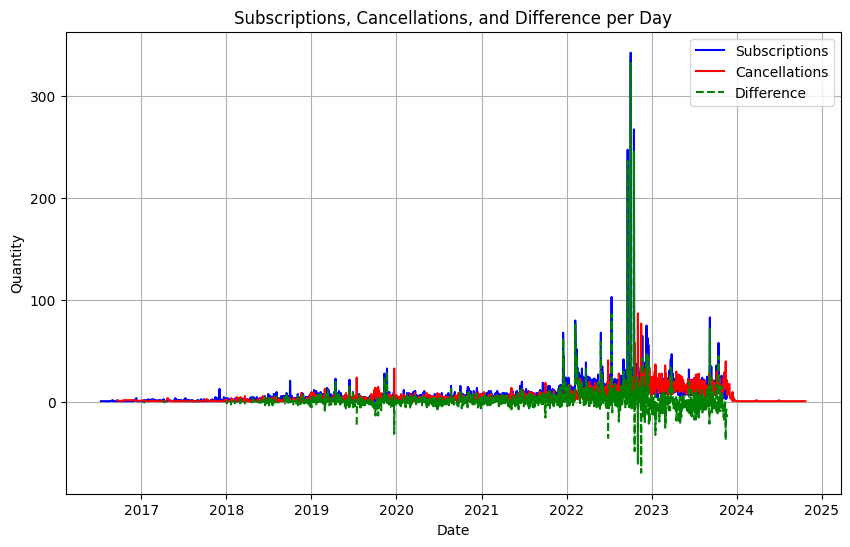

In [66]:
# Convert the date lists to date objects
subscription_dates = subscriptions_data['SUBSCRIPTION_BEGIN_DATE'].dt.date
cancellation_dates = subscriptions_data['SUBSCRIPTION_END_DATE'].dropna().dt.date

# Convert the date lists to date objects
subscription_dates = pd.to_datetime(subscription_dates)
cancellation_dates = pd.to_datetime(cancellation_dates)

# Count subscriptions and cancellations per day
subscription_counts_daily = subscription_dates.groupby(subscription_dates.dt.to_period('D')).count()
cancellation_counts_daily = cancellation_dates.groupby(cancellation_dates.dt.to_period('D')).count()

# Calculate the difference between subscriptions and cancellations per day
difference_daily = subscription_counts_daily - cancellation_counts_daily

# Plot the curve of subscriptions, cancellations, and difference per day
plt.figure(figsize=(10, 6))
plt.plot(subscription_counts_daily.index.to_timestamp(), subscription_counts_daily.values, label='Subscriptions', color='blue')
plt.plot(cancellation_counts_daily.index.to_timestamp(), cancellation_counts_daily.values, label='Cancellations', color='red')
plt.plot(difference_daily.index.to_timestamp(), difference_daily.values, label='Difference', color='green', linestyle='--')
plt.title('Subscriptions, Cancellations, and Difference per Day')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.grid(True)
plt.show()


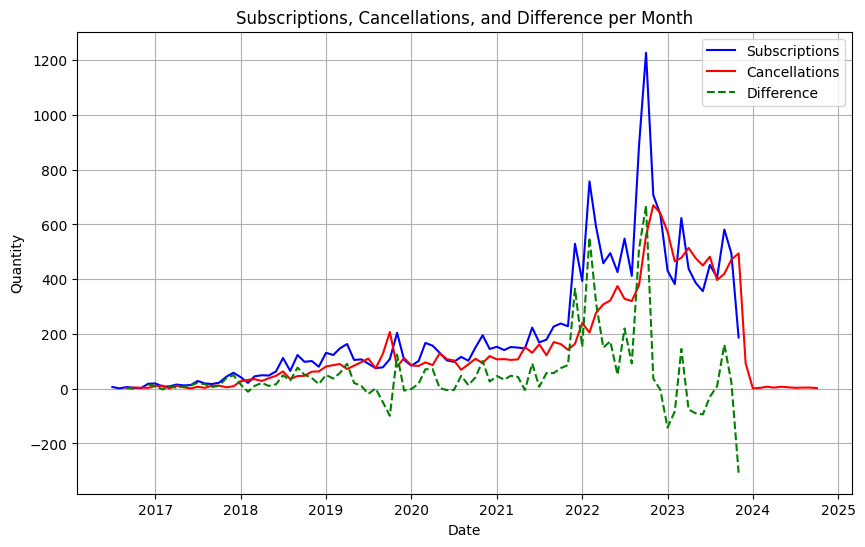

In [67]:
# Count subscriptions and cancellations per month
subscription_counts_monthly = subscription_dates.groupby(subscription_dates.dt.to_period('M')).count()
cancellation_counts_monthly = cancellation_dates.groupby(cancellation_dates.dt.to_period('M')).count()

# Calculate the difference between subscriptions and cancellations per month
difference_monthly = subscription_counts_monthly - cancellation_counts_monthly

# Plot the curve of subscriptions, cancellations, and difference per month
plt.figure(figsize=(10, 6))
plt.plot(subscription_counts_monthly.index.to_timestamp(), subscription_counts_monthly.values, label='Subscriptions', color='blue')
plt.plot(cancellation_counts_monthly.index.to_timestamp(), cancellation_counts_monthly.values, label='Cancellations', color='red')
plt.plot(difference_monthly.index.to_timestamp(), difference_monthly.values, label='Difference', color='green', linestyle='--')
plt.title('Subscriptions, Cancellations, and Difference per Month')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.grid(True)
plt.show()

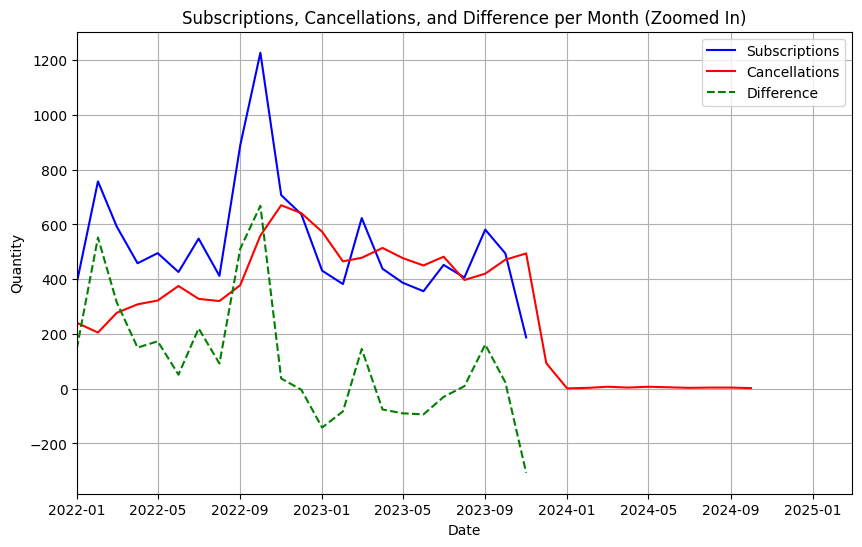

In [68]:
# Define the start date for zooming in
start_date = pd.to_datetime('2022-01-01')  # Update the date as needed

# Plot the curve of subscriptions, cancellations, and difference per month with zooming in
plt.figure(figsize=(10, 6))
plt.plot(subscription_counts_monthly.index.to_timestamp(), subscription_counts_monthly.values, label='Subscriptions', color='blue')
plt.plot(cancellation_counts_monthly.index.to_timestamp(), cancellation_counts_monthly.values, label='Cancellations', color='red')
plt.plot(difference_monthly.index.to_timestamp(), difference_monthly.values, label='Difference', color='green', linestyle='--')
plt.title('Subscriptions, Cancellations, and Difference per Month (Zoomed In)')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xlim(start_date, None)  # Set the x-axis limit to start from the defined start date
plt.legend()
plt.grid(True)
plt.show()


## Type of subscription/cancellation by date

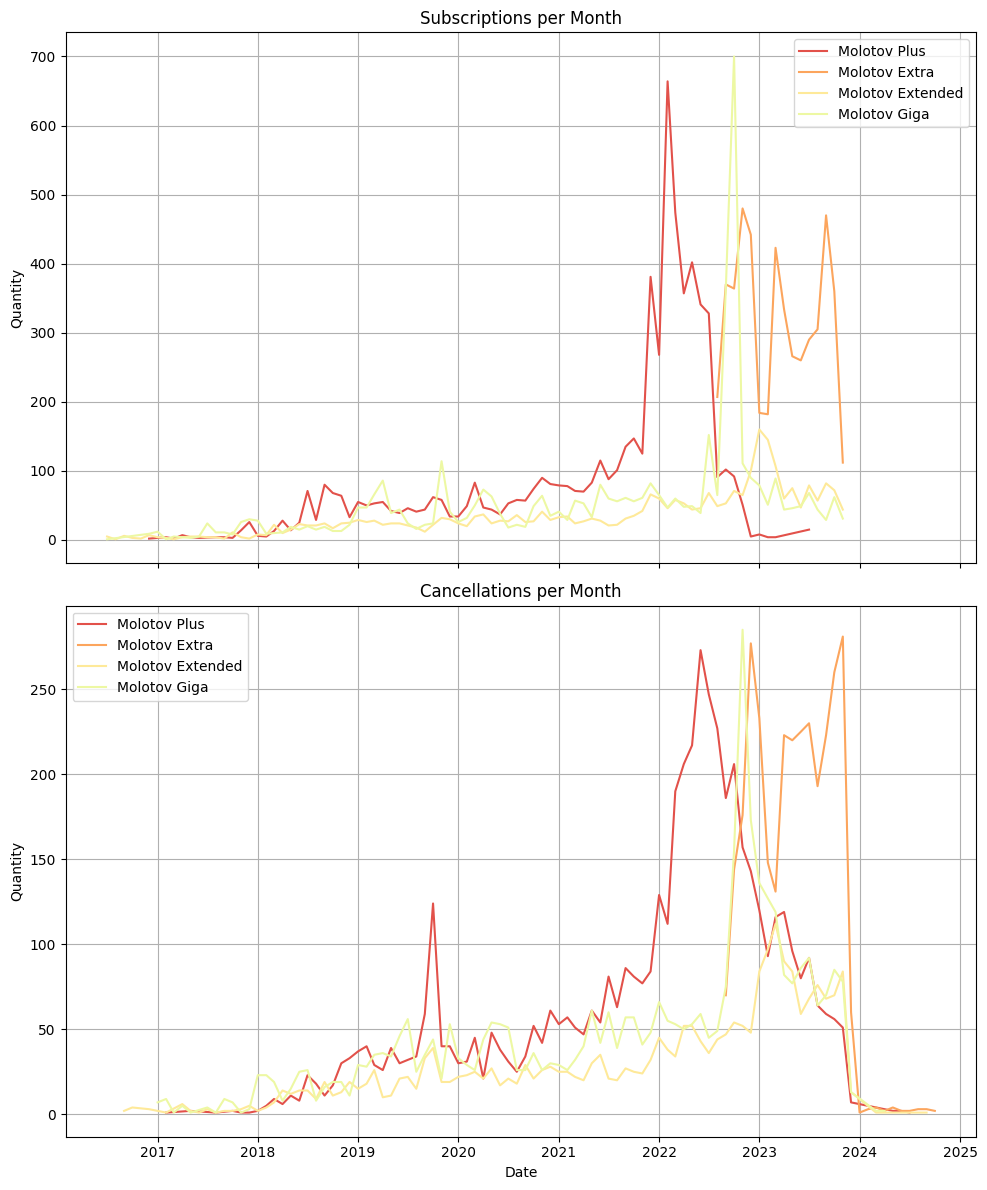

In [69]:
# Subscription and cancellation dates
subscription_dates = pd.to_datetime(subscriptions_data['SUBSCRIPTION_BEGIN_DATE'].dt.to_period('M').dt.start_time)
cancellation_dates = pd.to_datetime(subscriptions_data['SUBSCRIPTION_END_DATE'].dropna().dt.to_period('M').dt.start_time)

# Subscription types
subscription_types = subscriptions_data['PRODUCT_NAME'].unique()

# Create subplots
fig, axs = plt.subplots(2, figsize=(10, 12), sharex=True)

# Iterations for plot
for subscription_type in subscription_types:
    # Filter dates
    subscription_dates_filtered = subscription_dates[subscriptions_data['PRODUCT_NAME'] == subscription_type]
    cancellation_dates_filtered = cancellation_dates[subscriptions_data['PRODUCT_NAME'] == subscription_type]

    # Count subscriptions and cancellations
    subscription_counts_monthly = subscription_dates_filtered.groupby(subscription_dates_filtered.dt.to_period('M')).count()
    cancellation_counts_monthly = cancellation_dates_filtered.groupby(cancellation_dates_filtered.dt.to_period('M')).count()

    # Plot subscriptions
    axs[0].plot(subscription_counts_monthly.index.to_timestamp(), subscription_counts_monthly.values, label=subscription_type)
    axs[0].set_title('Subscriptions per Month')
    axs[0].set_ylabel('Quantity')
    axs[0].legend()
    axs[0].grid(True)

    # Plot cancellations
    axs[1].plot(cancellation_counts_monthly.index.to_timestamp(), cancellation_counts_monthly.values, label=subscription_type)
    axs[1].set_title('Cancellations per Month')
    axs[1].set_xlabel('Date')
    axs[1].set_ylabel('Quantity')
    axs[1].legend()
    axs[1].grid(True)

plt.tight_layout()
plt.show()


## Statts and preferences of subscribed users

In [70]:
# Calculate counts and percentages for subscribed and non-subscribed users (devices, channels, content types)
merged_data = pd.merge(users_data, subscriptions_data, left_on='ID', right_on='USER_ID', how='left')
merged_data = pd.merge(merged_data, watch_data, on='USER_ID', how='left')
merged_data = pd.merge(merged_data, channel_data, on='CHANNEL_ID', how='left')

# Number of subscribed and non_subscribed users
subscribed_users = len(subscriptions_data['USER_ID'].unique())
non_subscribed_users = total_users - subscribed_users

# Devices
subscribed_device_counts = (merged_data[merged_data['SUBSCRIPTION_BEGIN_DATE'].notnull()].groupby('DEVICE_TYPE')['DEVICE_TYPE'].count().nlargest(5))
non_subscribed_device_counts = (merged_data[merged_data['SUBSCRIPTION_BEGIN_DATE'].isnull()].groupby('DEVICE_TYPE')['DEVICE_TYPE'].count().nlargest(5))

subscribed_device_percentages = (subscribed_device_counts / subscribed_device_counts.sum()) * 100
non_subscribed_device_percentages = (non_subscribed_device_counts / non_subscribed_device_counts.sum()) * 100

# Channels
subscribed_channel_counts = (merged_data[merged_data['SUBSCRIPTION_BEGIN_DATE'].notnull()].groupby('CHANNEL_ID')['CHANNEL_ID'].count().nlargest(5))
non_subscribed_channel_counts = (merged_data[merged_data['SUBSCRIPTION_BEGIN_DATE'].isnull()].groupby('CHANNEL_ID')['CHANNEL_ID'].count().nlargest(5))

subscribed_channel_percentages = (subscribed_channel_counts / subscribed_channel_counts.sum()) * 100
non_subscribed_channel_percentages = (non_subscribed_channel_counts / non_subscribed_channel_counts.sum()) * 100

# Content Types
subscribed_asset_counts = (merged_data[merged_data['SUBSCRIPTION_BEGIN_DATE'].notnull()].groupby('ASSET_TYPE')['ASSET_TYPE'].count().nlargest(5))
non_subscribed_asset_counts = (merged_data[merged_data['SUBSCRIPTION_BEGIN_DATE'].isnull()].groupby('ASSET_TYPE')['ASSET_TYPE'].count().nlargest(5))

subscribed_asset_percentages = (subscribed_asset_counts / subscribed_asset_counts.sum()) * 100
non_subscribed_asset_percentages = (non_subscribed_asset_counts / non_subscribed_asset_counts.sum()) * 100


# Create the table data dictionary
table_data = {
    'Subscribed Users': [subscribed_users],
    'Non Subscribed Users': [non_subscribed_users]
}

# Add data for Top 5 Devices (format entries)
table_data['Top 5 Devices (Subscribed)'] = [f"{device}: {count} ({percentage:.2f}%)" for device, count, percentage in zip(subscribed_device_counts.index, subscribed_device_counts, subscribed_device_percentages)]
table_data['Top 5 Devices (Non Subscribed)'] = [f"{device}: {count} ({percentage:.2f}%)" for device, count, percentage in zip(non_subscribed_device_counts.index, non_subscribed_device_counts, non_subscribed_device_percentages)]

# Similar formatting for Top 5 Channels and Content Types
table_data['Top 5 Channels (Subscribed)'] = [f"{channel}: {count} ({percentage:.2f}%)" for channel, count, percentage in zip(subscribed_channel_counts.index, subscribed_channel_counts, subscribed_channel_percentages)]
table_data['Top 5 Channels (Non Subscribed)'] = [f"{channel}: {count} ({percentage:.2f}%)" for channel, count, percentage in zip(non_subscribed_channel_counts.index, non_subscribed_channel_counts, non_subscribed_channel_percentages)]
table_data['Top 5 Content type (Subscribed)'] = [f"{asset}: {count} ({percentage:.2f}%)" for asset, count, percentage in zip(subscribed_asset_counts.index, subscribed_asset_counts, subscribed_asset_percentages)]
table_data['Top 5 Content type (Non Subscribed)'] = [f"{asset}: {count} ({percentage:.2f}%)" for asset, count, percentage in zip(non_subscribed_asset_counts.index, non_subscribed_asset_counts, non_subscribed_asset_percentages)]

# Ensure all lists have at least 5 elements
for key in table_data:
    table_data[key] += [''] * (5 - len(table_data[key]))

# Create DataFrame
table_df = pd.DataFrame(table_data)

from prettytable import PrettyTable


# Separate information by category with spacing
print("USERS")  # Print category title with spacing
table = PrettyTable()
table.field_names = table_df.columns[:2]  # Select first two columns for Users
user_data = table_df[table_df.columns[:2]].values.tolist()  # Select all rows for first two columns
table.add_rows(user_data)  # Add all rows with selected columns
print(table)  # Print Users table

print("\nDEVICES")  # Print category title with spacing
table = PrettyTable()
table.field_names = table_df.columns[2:4]  # Select columns for Top 5 Devices
device_data = table_df[table_df.columns[2:4]].values.tolist()  # Select all rows for columns 2-4
table.add_rows(device_data)  # Add all rows with selected columns
print(table)  # Print Devices table

print("\nCHANNELS")  # Print category title with spacing
table = PrettyTable()
table.field_names = table_df.columns[4:6]  # Select columns for Top 5 Channels
channel_data = table_df[table_df.columns[4:6]].values.tolist()  # Select all rows for columns 4-5
table.add_rows(channel_data)  # Add all rows with selected columns
print(table)  # Print Channels table

print("\nCONTENT")  # Print category title with spacing
table = PrettyTable()
table.field_names = table_df.columns[6:]  # Select columns for Top 5 Content Types
content_data = table_df[table_df.columns[6:]].values.tolist()  # Select all rows for columns from 6th onwards
table.add_rows(content_data)  # Add all rows with selected columns
print(table)  # Print Content Types table



USERS
+------------------+----------------------+
| Subscribed Users | Non Subscribed Users |
+------------------+----------------------+
|       8768       |        33478         |
|                  |                      |
|                  |                      |
|                  |                      |
|                  |                      |
+------------------+----------------------+

DEVICES
+-----------------------------+--------------------------------+
|  Top 5 Devices (Subscribed) | Top 5 Devices (Non Subscribed) |
+-----------------------------+--------------------------------+
|     tv: 313784 (70.22%)     |    desktop: 33478 (100.00%)    |
|   desktop: 59507 (13.32%)   |                                |
|    phone: 46018 (10.30%)    |                                |
|    tablet: 26149 (5.85%)    |                                |
| smart_display: 1387 (0.31%) |                                |
+-----------------------------+--------------------------------+

CHA

## Relationship between

# Age distribution and preferences

In [71]:
# Total Users and Unique Watchers
# Total users: total_users
# Unique watchers: unique_users_watch_list
# Total unique watchers: unique_users_watch

# Filter for Valid Birthdays
users_data_cleaned = users_data[users_data['BIRTHDAY'].notna()]

# Calculate Age in Years
if 'AGE' not in users_data_cleaned.columns:
    users_data_cleaned['AGE'] = (pd.to_datetime('now') - pd.to_datetime(users_data_cleaned['BIRTHDAY'])).dt.days // 365

# Filter for valid ages (considering age <= 95)
users_data_cleaned = users_data_cleaned[users_data_cleaned['AGE'] <= 95]

# Check for 'AGE' Column Existence
if 'AGE' not in users_data_cleaned.columns:
    print("Warning: 'AGE' column not found in filtered data. Age group creation skipped.")
else:
    # Define age ranges for grouping
    age_ranges = [(0, 18), (18, 25), (25, 35), (35, 45), (45, 60), (60, 95)]

    # Define age labels
    age_labels = ["0-18 years", "18-25 years", "25-35 years", "35-45 years", "45-60 years", "60-95 years"]

    # Create 'AGE_GROUP' column based on age ranges and labels
    users_data_cleaned['AGE_GROUP'] = pd.cut(users_data_cleaned['AGE'], bins=[x[0] for x in age_ranges] + [95], labels=age_labels)

    # Merge watch data with user data to include age group information for each view
    watch_data_with_age = pd.merge(watch_data, users_data_cleaned[['ID', 'AGE', 'AGE_GROUP']], left_on='USER_ID', right_on='ID', how='left')

    # Initialize variables outside the loop
    top_3_content_by_age = pd.DataFrame(columns=['AGE_GROUP', 'PROGRAM_KIND', 'view_count', 'percentage'])
    top_3_devices_by_age = pd.DataFrame(columns=['AGE_GROUP', 'DEVICE_TYPE', 'view_count', 'percentage'])

    # Analyze Content Preference by Age Group
    content_preference_by_age = watch_data_with_age.groupby(['AGE_GROUP', 'PROGRAM_KIND']).size().reset_index(name='view_count')
    total_views_by_age = content_preference_by_age.groupby('AGE_GROUP')['view_count'].sum()

    for age_group in content_preference_by_age['AGE_GROUP'].unique():
        age_group_data = content_preference_by_age[content_preference_by_age['AGE_GROUP'] == age_group]
        age_group_data['percentage'] = (age_group_data['view_count'] / total_views_by_age[age_group]) * 100
        top_3_content_by_age = top_3_content_by_age.append(age_group_data.sort_values('percentage', ascending=False).head(3), ignore_index=True)

    # Analyze Device Preference by Age Group
    device_preference_by_age = watch_data_with_age.groupby(['AGE_GROUP', 'DEVICE_TYPE']).size().reset_index(name='view_count')
    total_views_by_age = device_preference_by_age.groupby('AGE_GROUP')['view_count'].sum()

    for age_group in device_preference_by_age['AGE_GROUP'].unique():
        age_group_data = device_preference_by_age[device_preference_by_age['AGE_GROUP'] == age_group]
        age_group_data['percentage'] = (age_group_data['view_count'] / total_views_by_age[age_group]) * 100
        top_3_devices_by_age = top_3_devices_by_age.append(age_group_data.sort_values('percentage', ascending=False).head(3), ignore_index=True)

    # Calculate age distribution for users
    age_distribution_users = users_data_cleaned['AGE_GROUP'].value_counts(normalize=True).sort_index() * 100

    # Calculate age distribution for watchers (assuming 'USER_ID' is in watch_data)
    age_distribution_watchers = (watch_data_with_age['AGE_GROUP']
                                  .value_counts(normalize=True)
                                  .sort_index() * 100)

    # Display Results
    print("1. Age Distribution (Percentage)")
    print()
    print("Age Group | Users (%) | Watchers (%)")
    for age_group in age_distribution_users.index:
        user_percentage = age_distribution_users.loc[age_group]
        watcher_percentage = age_distribution_watchers.get(age_group, 0)  # Handle missing values
        print(f"{age_group:<10} | {user_percentage:.2f}% | {watcher_percentage:.2f}%")
    print()
    print("2. Top 3 Content Preferences by Age Group")
    print()

    print("Age Group | Content Type 1 | Percentage 1 | Content Type 2 | Percentage 2 | Content Type 3 | Percentage 3")
    for age_group, group_data in top_3_content_by_age.groupby('AGE_GROUP'):
        print(f"{age_group:<10} | {group_data.iloc[0]['PROGRAM_KIND']:<13} | {group_data.iloc[0]['percentage']:.2f}% | {group_data.iloc[1]['PROGRAM_KIND']:<13} | {group_data.iloc[1]['percentage']:.2f}% | {group_data.iloc[2]['PROGRAM_KIND']:<13} | {group_data.iloc[2]['percentage']:.2f}%")
    print()
    print("3. Top 3 Device Preferences by Age Group")
    print()

    print("Age Group | Device Type 1 | Percentage 1 | Device Type 2 | Percentage 2 | Device Type 3 | Percentage 3")
    for age_group, group_data in top_3_devices_by_age.groupby('AGE_GROUP'):
        print(f"{age_group:<10} | {group_data.iloc[0]['DEVICE_TYPE']:<13} | {group_data.iloc[0]['percentage']:.2f}% | {group_data.iloc[1]['DEVICE_TYPE']:<13} | {group_data.iloc[1]['percentage']:.2f}% | {group_data.iloc[2]['DEVICE_TYPE']:<13} | {group_data.iloc[2]['percentage']:.2f}%")




1. Age Distribution (Percentage)

Age Group | Users (%) | Watchers (%)
0-18 years | 1.13% | 0.17%
18-25 years | 15.20% | 5.57%
25-35 years | 20.73% | 14.34%
35-45 years | 20.34% | 22.76%
45-60 years | 25.47% | 32.94%
60-95 years | 17.13% | 24.22%

2. Top 3 Content Preferences by Age Group

Age Group | Content Type 1 | Percentage 1 | Content Type 2 | Percentage 2 | Content Type 3 | Percentage 3
0-18 years | Enfants       | 27.20% | Informations  | 21.60% | Sport         | 15.20%
18-25 years | Informations  | 33.53% | Séries        | 20.25% | Enfants       | 12.89%
25-35 years | Informations  | 38.47% | Séries        | 17.22% | Sport         | 10.73%
35-45 years | Informations  | 39.51% | Séries        | 16.67% | Enfants       | 11.52%
45-60 years | Informations  | 44.91% | Séries        | 15.30% | Films         | 10.41%
60-95 years | Informations  | 48.85% | Séries        | 15.00% | Films         | 10.79%

3. Top 3 Device Preferences by Age Group

Age Group | Device Type 1 | Percentage 

1. Age Distribution for All Users (Percentage)

Age Group | Users (%)
0-18 years    | 1.13%
18-25 years   | 15.20%
25-35 years   | 20.73%
35-45 years   | 20.34%
45-60 years   | 25.47%
60-95 years   | 17.13%

 Tv Users (Percentage)

Age Group | Users (%)
0-18 years    | 0.16%
18-25 years   | 5.73%
25-35 years   | 16.69%
35-45 years   | 25.15%
45-60 years   | 30.95%
60-95 years   | 21.32%

 Phone Users (Percentage)

Age Group | Users (%)
0-18 years    | 0.29%
18-25 years   | 5.23%
25-35 years   | 13.40%
35-45 years   | 25.00%
45-60 years   | 37.77%
60-95 years   | 18.31%

 Desktop Users (Percentage)

Age Group | Users (%)
0-18 years    | 0.18%
18-25 years   | 6.72%
25-35 years   | 9.90%
35-45 years   | 15.58%
45-60 years   | 35.63%
60-95 years   | 31.99%

 Tablet Users (Percentage)

Age Group | Users (%)
0-18 years    | 0.01%
18-25 years   | 3.35%
25-35 years   | 7.16%
35-45 years   | 14.33%
45-60 years   | 33.49%
60-95 years   | 41.66%

 Smart_display Users (Percentage)

Age Group | Use

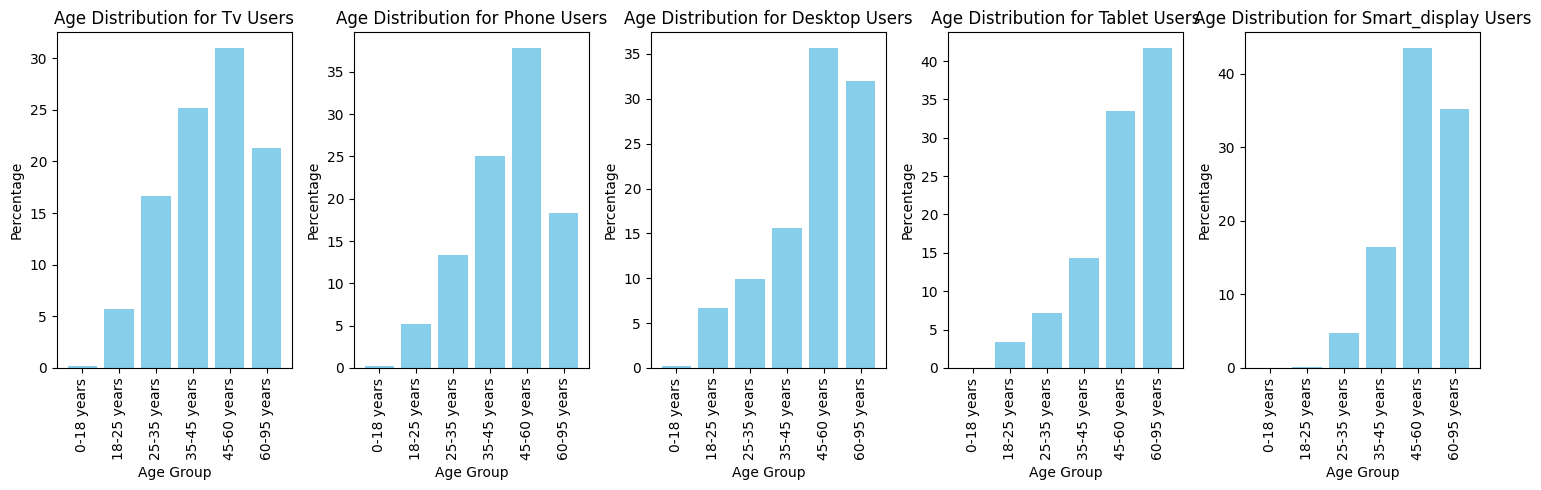

In [72]:
# Filter for Valid Birthdays
users_data_cleaned = users_data[users_data['BIRTHDAY'].notna()]

# Calculate Age in Years
users_data_cleaned['AGE'] = (pd.to_datetime('now') - pd.to_datetime(users_data_cleaned['BIRTHDAY'])).dt.days // 365

# Filter for valid ages (considering age <= 95)
users_data_cleaned = users_data_cleaned[users_data_cleaned['AGE'] <= 95]

# Define age ranges for grouping
age_ranges = [(0, 18), (18, 25), (25, 35), (35, 45), (45, 60), (60, 95)]

# Define age labels
age_labels = ["0-18 years", "18-25 years", "25-35 years", "35-45 years", "45-60 years", "60-95 years"]

# Create 'AGE_GROUP' column based on age ranges and labels
users_data_cleaned['AGE_GROUP'] = pd.cut(users_data_cleaned['AGE'], bins=[x[0] for x in age_ranges] + [age_ranges[-1][1]], labels=age_labels)

# Merge watch data with user data to include age group information for each view
watch_data_with_age = pd.merge(watch_data, users_data_cleaned[['ID', 'AGE', 'AGE_GROUP']], left_on='USER_ID', right_on='ID', how='left')

# Calculate age distribution for users
age_distribution_users = users_data_cleaned['AGE_GROUP'].value_counts(normalize=True).sort_index() * 100

# Display Results for Users
print("1. Age Distribution for All Users (Percentage)")
print()
print("Age Group | Users (%)")
for age_group in age_distribution_users.index:
    user_percentage = age_distribution_users.loc[age_group]
    print(f"{age_group:<13} | {user_percentage:.2f}%")
print()

# Calculate and display age distribution for each device type
device_types = watch_data_with_age['DEVICE_TYPE'].dropna().unique()

fig, axs = plt.subplots(1, len(device_types), figsize=(15, 5))

for i, device_type in enumerate(device_types):
    # Filter data for the current device type
    data_for_device_type = watch_data_with_age[watch_data_with_age['DEVICE_TYPE'] == device_type]

    # Calculate age distribution for the current device type
    age_distribution_device_type = (data_for_device_type['AGE_GROUP']
                                    .value_counts(normalize=True)
                                    .sort_index() * 100)

    # Display Results for the current device type
    if isinstance(device_type, str):
        print(f" {device_type.capitalize()} Users (Percentage)")
        print()
        print("Age Group | Users (%)")
        for age_group in age_distribution_device_type.index:
            device_percentage = age_distribution_device_type.get(age_group, 0)  # Handle missing values
            print(f"{age_group:<13} | {device_percentage:.2f}%")
        print()

        # Plot histogram for the current device type
        axs[i].bar(age_distribution_device_type.index, age_distribution_device_type.values, color='skyblue')
        axs[i].set_title(f'Age Distribution for {device_type.capitalize()} Users')
        axs[i].set_xlabel('Age Group')
        axs[i].set_ylabel('Percentage')
        axs[i].set_xticklabels(age_distribution_device_type.index, rotation=90)  # Rotate X-axis labels


plt.tight_layout()
plt.show()




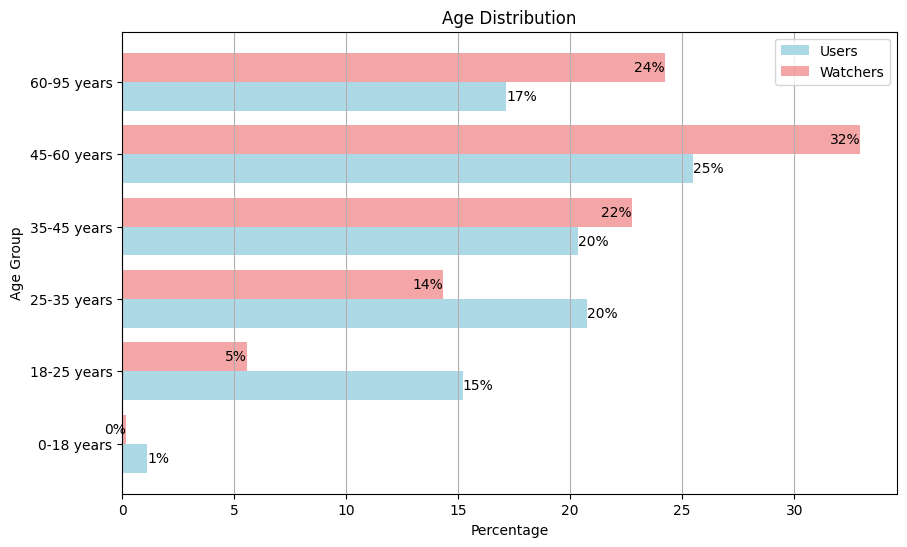

In [73]:
# Calculate age distribution for users
age_distribution_users = users_data_cleaned['AGE_GROUP'].value_counts(normalize=True).sort_index() * 100

# Calculate age distribution for watchers (assuming 'USER_ID' is in watch_data)
age_distribution_watchers = (watch_data_with_age['AGE_GROUP']
                                .value_counts(normalize=True)
                                .sort_index() * 100)

# Set bar width
bar_width = 0.4

# Create a bar chart
plt.figure(figsize=(10, 6))

# Define the positions for the bars
positions = np.arange(len(age_distribution_users))

# Plot user age distribution
plt.barh(positions - bar_width/2, age_distribution_users, height=bar_width, color='lightblue', label='Users')

# Plot watcher age distribution
plt.barh(positions + bar_width/2, age_distribution_watchers, height=bar_width, color='lightcoral', label='Watchers', alpha=0.7)

# Add percentages for user age distribution
for i, (age_group, percentage) in enumerate(age_distribution_users.items()):
    plt.text(percentage, i - bar_width/2, f'{int(percentage)}%', ha='left', va='center', fontsize=10)

# Add percentages for watcher age distribution
for i, (age_group, percentage) in enumerate(age_distribution_watchers.items()):
    plt.text(percentage, i + bar_width/2, f'{int(percentage)}%', ha='right', va='center', fontsize=10)

# Customize the plot
plt.xlabel('Percentage')
plt.ylabel('Age Group')
plt.title('Age Distribution')
plt.legend()
plt.grid(axis='x')

# Adjust y-axis ticks and labels
plt.yticks(np.arange(len(age_distribution_users)), age_distribution_users.index)

# Show the plot
plt.show()


In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate age distribution for users
age_distribution_users = users_data_cleaned['AGE_GROUP'].value_counts(normalize=True).sort_index() * 100

# Calculate age distribution for watchers (assuming 'USER_ID' is in watch_data)
age_distribution_watchers = (watch_data_with_age['AGE_GROUP']
                                .value_counts(normalize=True)
                                .sort_index() * 100)

# Calculate age distribution for subscribers
age_distribution_subscribers = (subscriptions_data_with_age['AGE_GROUP']
                                    .value_counts(normalize=True)
                                    .sort_index() * 100)

# Set bar width
bar_width = 0.3

# Create a bar chart
plt.figure(figsize=(10, 6))

# Define the positions for the bars
positions = np.arange(len(age_distribution_users))

# Plot user age distribution
plt.barh(positions - bar_width, age_distribution_users, height=bar_width, color='lightblue', label='Users')

# Plot watcher age distribution
plt.barh(positions, age_distribution_watchers, height=bar_width, color='lightcoral', label='Watchers', alpha=0.7)

# Plot subscriber age distribution
plt.barh(positions + bar_width, age_distribution_subscribers, height=bar_width, color='lightgreen', label='Subscribers', alpha=0.7)

# Add percentages for user age distribution
for i, (age_group, percentage) in enumerate(age_distribution_users.items()):
    plt.text(percentage, i - bar_width, f'{int(percentage)}%', ha='left', va='center', fontsize=10)

# Add percentages for watcher age distribution
for i, (age_group, percentage) in enumerate(age_distribution_watchers.items()):
    plt.text(percentage, i, f'{int(percentage)}%', ha='right', va='center', fontsize=10)

# Add percentages for subscriber age distribution
for i, (age_group, percentage) in enumerate(age_distribution_subscribers.items()):
    plt.text(percentage, i + bar_width, f'{int(percentage)}%', ha='right', va='center', fontsize=10)

# Customize the plot
plt.xlabel('Percentage')
plt.ylabel('Age Group')
plt.title('Age Distribution')
plt.legend()
plt.grid(axis='x')

# Adjust y-axis ticks and labels
plt.yticks(np.arange(len(age_distribution_users)), age_distribution_users.index)

# Show the plot
plt.show()


NameError: name 'subscriptions_data_with_age' is not defined

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate age distribution for users (cantidad)
age_distribution_users = users_data_cleaned['AGE_GROUP'].value_counts().sort_index()

# Calculate age distribution for watchers (cantidad)
age_distribution_watchers = watch_data_with_age['AGE_GROUP'].value_counts().sort_index()

# Calculate age distribution for subscribers (cantidad)
age_distribution_subscribers = subscriptions_data_with_age['AGE_GROUP'].value_counts().sort_index()

# Set bar width
bar_width = 0.3

# Create a bar chart
plt.figure(figsize=(10, 6))

# Define the positions for the bars
positions = np.arange(len(age_distribution_users))

# Plot user age distribution
plt.barh(positions - bar_width, age_distribution_users, height=bar_width, color='lightblue', label='Users')

# Plot watcher age distribution
plt.barh(positions, age_distribution_watchers, height=bar_width, color='lightcoral', label='Watchers', alpha=0.7)

# Plot subscriber age distribution
plt.barh(positions + bar_width, age_distribution_subscribers, height=bar_width, color='lightgreen', label='Subscribers', alpha=0.7)

# Add counts for user age distribution
for i, (age_group, count) in enumerate(age_distribution_users.items()):
    plt.text(count, i - bar_width, f'{count}', ha='left', va='center', fontsize=10)

# Add counts for watcher age distribution
for i, (age_group, count) in enumerate(age_distribution_watchers.items()):
    plt.text(count, i, f'{count}', ha='right', va='center', fontsize=10)

# Add counts for subscriber age distribution
for i, (age_group, count) in enumerate(age_distribution_subscribers.items()):
    plt.text(count, i + bar_width, f'{count}', ha='right', va='center', fontsize=10)

# Customize the plot
plt.xlabel('Count')
plt.ylabel('Age Group')
plt.title('Age Distribution')
plt.legend()
plt.grid(axis='x')

# Adjust y-axis ticks and labels
plt.yticks(np.arange(len(age_distribution_users)), age_distribution_users.index)

# Show the plot
plt.show()


## Distribution of users tenure and preferences by tenure

In [ ]:
from datetime import datetime

# Assuming we have an 'ACCOUNT_CREATION_DATE' column in users_data_cleaned
# with the users' account creation dates

# Calculate the users' tenure
users_data_cleaned['ACCOUNT_CREATION_DATE'] = pd.to_datetime(users_data_cleaned['ACCOUNT_CREATION_DATE'])
current_date = datetime.now()
users_data_cleaned['User_Age'] = (current_date - users_data_cleaned['ACCOUNT_CREATION_DATE']).dt.days / 365

# Visualize the distribution of user tenure
plt.figure(figsize=(10, 6))
ax = sns.histplot(users_data_cleaned['User_Age'], bins=range(0, 11, 1), kde=True, color='skyblue')

# Add gray vertical lines every six months
for year in range(0, 10):
    ax.axvline(x=year + 0.5, color='gray', linestyle='--', linewidth=0.5)

# Add percentages on top of the bars
total_users_cl = users_data_cleaned.shape[0]
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height() / total_users_cl)  # Modified to remove decimals
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title('Distribution de l\'ancienneté des utilisateurs')
plt.xlabel('Ancienneté (années)')
plt.ylabel('Nombre d\'utilisateurs')
plt.xticks(range(0, 11))
plt.yticks(range(0, 10001, 1000))  # Set upper limit on y-axis to 10,000 users
plt.xlim(0, 10)  # Set upper limit on x-axis to 10 years
plt.ylim(0, 10000)  # Set upper limit on y-axis to 10,000 users
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()




In [ ]:
# Merge dataframes to get antiquity information
merged_data = pd.merge(users_data, watch_data, left_on='ID', right_on='USER_ID', how='inner')

# Convert account creation date to datetime
merged_data['ACCOUNT_CREATION_DATE'] = pd.to_datetime(merged_data['ACCOUNT_CREATION_DATE'])

# Calculate user antiquity in days
merged_data['USER_ANTIQUITY'] = (pd.to_datetime('now') - merged_data['ACCOUNT_CREATION_DATE']).dt.days

# Define antiquity ranges
antiquity_bins = [0, 730, 1460, 2190, 2920, float('inf')]  # Ranges: 0-2 years, 2-4 years, 4-6 years, 6-8 years, 8+ years
antiquity_labels = ['0-2 years', '2-4 years', '4-6 years', '6-8 years', '8+ years']

# Assign antiquity group to each user based on account creation date
merged_data['USER_ANTIQUITY_GROUP'] = pd.cut(merged_data['USER_ANTIQUITY'], bins=antiquity_bins, labels=antiquity_labels)

# Analyze content preference by antiquity group
content_preference_by_antiquity_group = merged_data.groupby(['USER_ANTIQUITY_GROUP', 'PROGRAM_KIND']).size().unstack(fill_value=0)

# Convert to percentage of users
total_users_by_antiquity_group = merged_data['USER_ANTIQUITY_GROUP'].value_counts()
content_preference_by_antiquity_group_percentage = content_preference_by_antiquity_group.div(total_users_by_antiquity_group, axis=0) * 100

# Define tenure groups and their explanations
tenure_groups = {
    "0-2 years": "Less than 2 years on the platform",
    "2-4 years": "Between 2 and 4 years on the platform",
    "4-6 years": "Between 4 and 6 years on the platform",
    "6-8 years": "Between 6 and 8 years on the platform",
    "8+ years": "More than 8 years on the platform"
}

# Create a table to display the top 5 preferred content types and their percentages within each tenure group
content_preference_table = []

for tenure_group, content_preferences in content_preference_by_antiquity_group_percentage.iterrows():
    top_5_contents = content_preferences.sort_values(ascending=False).head(5)
    total_users_in_group = total_users_by_antiquity_group.get(tenure_group, 0)
    for content, percentage in top_5_contents.items():
        content_preference_table.append([tenure_group, content, f'{percentage:.2f}%'])

# Sort the content preference table by tenure group and percentage of people
content_preference_table.sort(key=lambda x: (list(tenure_groups.keys()).index(x[0]), -float(x[2][:-1])))

# Display the table with properly aligned columns and visual separation between groups
print("TENURE GROUP         |   CONTENT PREFERRED    |   PERCENTAGE OF PEOPLE")
print("-" * 60)  # Horizontal line to separate header
for i, row in enumerate(content_preference_table):
    # Print tenure group with visual separation
    if i > 0 and content_preference_table[i][0] != content_preference_table[i-1][0]:
        print("-" * 60)  # Horizontal line between tenure groups
    print(f"{row[0]:<20} | {row[1]:<20} | {row[2]:>20}")


# Devices and asset types analysis

In [ ]:
# Calculate view percentage by device type
content_by_device = watch_data.groupby(['DEVICE_TYPE', 'PROGRAM_KIND']).size().unstack(fill_value=0)

content_by_device_percentage = content_by_device.div(content_by_device.sum(axis=1), axis=0) * 100

# Color palette
pastel_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700']

# Plot results
ax = content_by_device_percentage.plot(kind='bar', stacked=True, figsize=(12, 6), color=pastel_colors)
plt.title('Content Viewed by Device Type (Percentage)')
plt.xlabel('Device Type')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Program Kind', bbox_to_anchor=(1.05, 1), loc='upper left')

# Percent of each bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width / 2, y + height / 2), ha='center', va='center', color='black')

plt.tight_layout()
plt.show()


In [ ]:
# Asset by age range
asset_by_age_range = watch_data_with_age.groupby(pd.cut(watch_data_with_age['AGE'], bins=[x[0] for x in age_ranges] + [95], labels=age_labels))['ASSET_TYPE'].value_counts().unstack(fill_value=0)

# Transpose
asset_by_age_range_transposed = asset_by_age_range.T

# Plot results
asset_by_age_range_transposed.plot(kind='line', figsize=(12, 6))
plt.title('Asset Type Viewed by Age Group')
plt.xlabel('Asset Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Asset type by age

In [ ]:
# Asset type by age
total_by_age_range = asset_by_age_range.sum(axis=1)
asset_by_age_range_percentage = asset_by_age_range.div(total_by_age_range, axis=0) * 100

# Color palette
pastel_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700']

# Plot resolts
ax = asset_by_age_range_percentage.plot(kind='bar', stacked=True, figsize=(12, 6), color=pastel_colors)
plt.title('Asset Type Viewed by Age Group (Percentage)')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Asset Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Percentages in bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width / 2, y + height / 2), ha='center', va='center', color='black')

plt.tight_layout()
plt.show()


## Subscriptions by age

In [ ]:
# Function to assign age group labels
def get_age_group_label(age):
    for i, (start, end) in enumerate(age_ranges):
        if start <= age < end:
            return age_labels[i]
    return "Unknown"

# Apply the function to get the age group for each user
users_data_cleaned['AGE_GROUP'] = users_data_cleaned['AGE'].apply(get_age_group_label)

# Calculate the total count of users and users with subscriptions for each age group
age_group_counts = users_data_cleaned['AGE_GROUP'].value_counts().reindex(age_labels, fill_value=0)
age_group_subscription_counts = users_data_cleaned[users_data_cleaned['ID'].isin(subscriptions_data['USER_ID'])]['AGE_GROUP'].value_counts().reindex(age_labels, fill_value=0)

# Calculate the percentage of users with subscriptions for each age group
percentage_with_subscriptions = (age_group_subscription_counts / age_group_counts * 100).fillna(0)

# Create the stacked bar chart
plt.figure(figsize=(10, 6))

# Plot the stacked bars for users with subscriptions
plt.bar(age_labels, percentage_with_subscriptions, color='skyblue', label='Avec Abonnements', alpha=0.7)

# Plot the stacked bars for users without subscriptions on top of the previous bars
plt.bar(age_labels, 100 - percentage_with_subscriptions, bottom=percentage_with_subscriptions, color='salmon', label='Sans Abonnements', alpha=0.7)

# Add percentages for each age group
for i, (age_label, percentage) in enumerate(zip(age_labels, percentage_with_subscriptions)):
    plt.text(i, percentage / 2, f"{percentage:.0f}%", ha='center', va='center', color='white')
    plt.text(i, 100 - (100 - percentage) / 2, f"{100 - percentage:.0f}%", ha='center', va='center', color='white')

# Configure the chart
plt.title("Pourcentage de Personnes avec et sans Abonnements par Groupe d'Âge")
plt.xlabel('Groupe d\'Âge')
plt.ylabel('Pourcentage')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the chart
plt.show()


## Users, subscriptions, cancellations and never-subscribed by age

In [ ]:
# Calcular la cantidad de usuarios, suscripciones y desuscripciones por grupo de edad
age_group_user_counts = []
age_group_subscription_counts = []
age_group_desubscription_counts = []

for age_range in age_ranges:
    age_group = users_data_cleaned[(users_data_cleaned['AGE'] >= age_range[0]) & (users_data_cleaned['AGE'] < age_range[1])]
    age_group_users = len(age_group)

    # Contar las suscripciones en este grupo de edad
    subscriptions_in_age_group = subscriptions_data[subscriptions_data['USER_ID'].isin(age_group['ID'])]
    age_group_subscriptions = len(subscriptions_in_age_group)

    # Calcular desuscripciones restando suscripciones del total de usuarios en este grupo de edad
    age_group_desubscriptions = age_group_users - age_group_subscriptions

    # Agregar los recuentos a las listas respectivas
    age_group_user_counts.append(age_group_users)
    age_group_subscription_counts.append(age_group_subscriptions)
    age_group_desubscription_counts.append(age_group_desubscriptions)

# Preparar los datos para el gráfico
bar_width = 0.25
index = np.arange(len(age_labels))

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))

# Plotear las barras para las suscripciones
plt.bar(index - bar_width, age_group_subscription_counts, width=bar_width, color='skyblue', label='Abonnements')
for i, count in enumerate(age_group_subscription_counts):
    plt.text(i - bar_width, count, str(count), ha='center', va='bottom')

# Plotear las barras para las desuscripciones
plt.bar(index, age_group_desubscription_counts, width=bar_width, color='orange', label='Désabonnements')
for i, count in enumerate(age_group_desubscription_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Plotear las barras para los usuarios
plt.bar(index + bar_width, age_group_user_counts, width=bar_width, color='lightgreen', label='Utilisateurs')
for i, count in enumerate(age_group_user_counts):
    plt.text(i + bar_width, count, str(count), ha='center', va='bottom')

# Agregar etiquetas y título
plt.title('Nombre d\'Abonnements, de Désabonnements et d\'Utilisateurs par Groupe d\'Âge')
plt.xlabel('Groupe d\'Âge')
plt.ylabel('Nombre')
plt.xticks(index, age_labels)
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()




In [ ]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado subscriptions_data con la información de suscripciones
# y otro DataFrame llamado watch_data con la información de visualización y los dispositivos utilizados

# Filtrar los suscriptores con device_type = 'tv'
tv_subscribers = subscriptions_data[subscriptions_data['USER_ID'].isin(watch_data[watch_data['DEVICE_TYPE'] == 'tv']['USER_ID'])]
tv_subscribers_with_age = pd.merge(tv_subscribers, users_data_cleaned[['ID', 'AGE']], left_on='USER_ID', right_on='ID', how='left')

# Fusionar los datos de los suscriptores con las edades de los usuarios en watch_data
tv_subscribers_with_age = pd.merge(tv_subscribers_with_age, watch_data[['USER_ID']], on='USER_ID', how='left')

# Calcular la edad promedio de los suscriptores que utilizan tv
average_age_tv_subscribers = tv_subscribers_with_age['AGE'].mean()

print("La edad promedio de los suscriptores que utilizan TV es:", round(average_age_tv_subscribers, 2))


In [ ]:
# Identify subscriber users
subscriber_ids = subscriptions_data['USER_ID'].unique()

# Filter subscriber watch history and calculate the average duration per session
subscriber_watch_history = watch_data[watch_data['USER_ID'].isin(subscriber_ids)]
subscriber_avg_duration = subscriber_watch_history['DURATION'].mean() / 60  # Convert to minutes

# Filter non-subscriber watch history and calculate the average duration per session
non_subscriber_watch_history = watch_data[~watch_data['USER_ID'].isin(subscriber_ids)]
non_subscriber_avg_duration = non_subscriber_watch_history['DURATION'].mean() / 60  # Convert to minutes

# Calculate the average duration per session for all users
avg_duration_all_users = watch_data['DURATION'].mean() / 60  # Convert to minutes

print("Average duration per session for subscribers:", int(subscriber_avg_duration), "minutes")
print("Average duration per session for non-subscribers:", int(non_subscriber_avg_duration), "minutes")
print("Average duration per session for all users:", int(avg_duration_all_users), "minutes")

In [ ]:

# Convert dates to datetime objects
subscriptions_data['SUBSCRIPTION_BEGIN_DATE'] = pd.to_datetime(subscriptions_data['SUBSCRIPTION_BEGIN_DATE'])
watch_data['DATE_DAY'] = pd.to_datetime(watch_data['DATE_DAY'])

# Get unique months in the dataset
unique_months = watch_data['DATE_DAY'].dt.to_period('M').unique()

# Iterate over each month
for month_period in sorted(unique_months):  # Sort the months
    month_of_interest = month_period.strftime('%Y-%m')  # Get the year and month

    # Filter subscribers who subscribed in the month of interest
    subscribers_in_month = subscriptions_data[subscriptions_data['SUBSCRIPTION_BEGIN_DATE'].dt.to_period('M').astype(str) == month_of_interest]['USER_ID']

    # Filter watch history for subscribers in the month of interest
    subscriber_watch_history = watch_data[watch_data['USER_ID'].isin(subscribers_in_month)]

    # Calculate total duration per month for subscribers in the month of interest
    total_duration_per_month = subscriber_watch_history.groupby(subscriber_watch_history['DATE_DAY'].dt.to_period('M'))['DURATION'].sum() / 60  # Convert to minutes

    # Plot the data
    plt.figure(figsize=(5, 3))
    plt.plot(total_duration_per_month.index.astype(str), total_duration_per_month.values, marker='o', linestyle='-')
    plt.title(f'Total Duration per Month for Subscribers in {month_of_interest}')
    plt.xlabel('Month')
    plt.ylabel('Total Duration (minutes)')
    plt.grid(True)
    plt.xticks(rotation=45)

    # Add vertical line for subscription month
    subscription_month = subscriptions_data[subscriptions_data['SUBSCRIPTION_BEGIN_DATE'].dt.to_period('M').astype(str) == month_of_interest]['SUBSCRIPTION_BEGIN_DATE'].iloc[0]
    plt.axvline(x=subscription_month.strftime('%Y-%m'), color='r', linestyle='--', label='Subscription Month')

    # Add vertical lines for all months
    for month in unique_months:
        plt.axvline(x=month.strftime('%Y-%m'), color='gray', linestyle=':', alpha=0.5)

    plt.tight_layout()
    plt.legend()
    plt.show()



In [ ]:
import matplotlib.pyplot as plt

# Convertir fechas a objetos datetime
subscriptions_data['SUBSCRIPTION_BEGIN_DATE'] = pd.to_datetime(subscriptions_data['SUBSCRIPTION_BEGIN_DATE'])
watch_data['DATE_DAY'] = pd.to_datetime(watch_data['DATE_DAY'])

# Filtrar las filas de watch_data donde el DEVICE_TYPE es 'tv'
watch_data_tv = watch_data[watch_data['DEVICE_TYPE'] == 'tv']

# Obtener los meses únicos en el conjunto de datos
unique_months = watch_data_tv['DATE_DAY'].dt.to_period('M').unique()

# Crear la figura para la presentación vertical con fondo blanco
fig, axs = plt.subplots(nrows=len(unique_months), figsize=(14, 2 * len(unique_months)), facecolor='white')

# Variable para controlar la primera iteración y mostrar las etiquetas del eje X solo una vez
primera_iteracion = True

# Iterar sobre cada mes
for i, month_period in enumerate(sorted(unique_months)):  # Ordenar los meses
    month_of_interest = month_period.strftime('%Y-%m')  # Obtener el año y el mes

    # Filtrar los suscriptores que se suscribieron en el mes de interés
    subscribers_in_month = subscriptions_data[subscriptions_data['SUBSCRIPTION_BEGIN_DATE'].dt.to_period('M').astype(str) == month_of_interest]['USER_ID']

    # Filtrar el historial de visualización para los suscriptores en el mes de interés
    subscriber_watch_history = watch_data_tv[watch_data_tv['USER_ID'].isin(subscribers_in_month)]

    # Calcular la duración total por mes para los suscriptores en el mes de interés y convertir a minutos
    total_duration_per_month = subscriber_watch_history.groupby(subscriber_watch_history['DATE_DAY'].dt.to_period('M'))['DURATION'].sum() / (60*60)

    # Graficar los datos
    ax = axs[i] if len(unique_months) > 1 else axs  # Manejar el caso de un solo mes
    ax.plot(total_duration_per_month.index.astype(str), total_duration_per_month.values, marker='o', linestyle='-')
    ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=16)  # Aumentar el tamaño de las etiquetas

    # Agregar línea vertical para el mes de suscripción
    subscription_month = subscriptions_data[subscriptions_data['SUBSCRIPTION_BEGIN_DATE'].dt.to_period('M').astype(str) == month_of_interest]['SUBSCRIPTION_BEGIN_DATE'].iloc[0]
    ax.axvline(x=subscription_month.strftime('%Y-%m'), color='r', linestyle='--')

    # Agregar líneas verticales para todos los meses
    if i == len(unique_months) - 1:  # Solo para el último mes
        for month in unique_months:
            ax.axvline(x=month.strftime('%Y-%m'), color='gray', linestyle=':', alpha=0.5)
        ax.set_xlabel('Mois', fontsize=16)  # Establecer etiqueta del eje X
        ax.set_xticklabels(ax.get_xticks(), rotation=90, ha='center', fontsize=16)  # Rotar las etiquetas del eje X verticalmente y centrarlas

    # Mostrar la duración total solo en el primer subtrama
    if i == 0:
        ax.set_ylabel('Durée Totale (heures)', fontsize=16)

    # Quitar los bordes superior y derecho del gráfico
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Ajustar el diseño y el espaciado
plt.tight_layout(pad=0.5)

# Establecer etiquetas del eje X solo en la parte superior del primer subtrama
for ax in axs[:-1]:
    ax.set_xticklabels([])

plt.show()



In [ ]:


# Convert dates to datetime objects
subscriptions_data['SUBSCRIPTION_BEGIN_DATE'] = pd.to_datetime(subscriptions_data['SUBSCRIPTION_BEGIN_DATE'])
subscriptions_data['SUBSCRIPTION_END_DATE'] = pd.to_datetime(subscriptions_data['SUBSCRIPTION_END_DATE'])
watch_data['DATE_DAY'] = pd.to_datetime(watch_data['DATE_DAY'])

# Get unique months in the dataset
unique_months = watch_data['DATE_DAY'].dt.to_period('M').unique()

# Create subplots
fig, axes = plt.subplots(len(unique_months), 1, figsize=(5, 3 * len(unique_months)), sharex=True)

# Iterate over each month
for i, month_period in enumerate(sorted(unique_months)):  # Sort the months
    month_of_interest = month_period.strftime('%Y-%m')  # Get the year and month

    # Filter subscribers who subscribed in the month of interest
    cancellations_in_month = subscriptions_data[(subscriptions_data['SUBSCRIPTION_END_DATE'].dt.to_period('M').astype(str) == month_of_interest) & (~subscriptions_data['SUBSCRIPTION_END_DATE'].isnull())]['USER_ID']

    # Filter watch history for subscribers in the month of interest
    cancellation_watch_history = watch_data[watch_data['USER_ID'].isin(cancellations_in_month)]

    # Calculate total duration per month for subscribers in the month of interest
    total_duration_per_month = cancellation_watch_history.groupby(cancellation_watch_history['DATE_DAY'].dt.to_period('M'))['DURATION'].sum() / 60  # Convert to minutes

    # Plot the data
    axes[i].plot(total_duration_per_month.index.astype(str), total_duration_per_month.values, marker='o', linestyle='-')
    axes[i].set_title(f'Total Duration per Month for Cancellations in {month_of_interest}')
    axes[i].set_ylabel('Total Duration (minutes)')
    axes[i].grid(True)
    axes[i].tick_params(axis='x', rotation=45)

    # Add vertical line for cancellation month
    cancellation_month = subscriptions_data[(subscriptions_data['SUBSCRIPTION_END_DATE'].dt.to_period('M').astype(str) == month_of_interest) & (~subscriptions_data['SUBSCRIPTION_END_DATE'].isnull())]['SUBSCRIPTION_END_DATE'].iloc[0]
    axes[i].axvline(x=cancellation_month.strftime('%Y-%m'), color='r', linestyle='--', label='Cancellation Month')

    # Add vertical lines for all months
    for month in unique_months:
        axes[i].axvline(x=month.strftime('%Y-%m'), color='gray', linestyle=':', alpha=0.5)

    axes[i].legend()

plt.tight_layout()
plt.show()
